In [ ]:
!pip install torch

In [ ]:
!pip install torchvision

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import torch.nn as nn
from torch.autograd import Variable
import random
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
import numpy as np

from tensorflow.keras.datasets import fashion_mnist

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split

#Importing and spliting data

The data is is spilt into 90% training and 10% validation (55000, 5000)

In [ ]:
# Load the Fashion MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Split the train set into train and validation sets
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

Text(0.5, 1.0, 'Class distribution in training set')

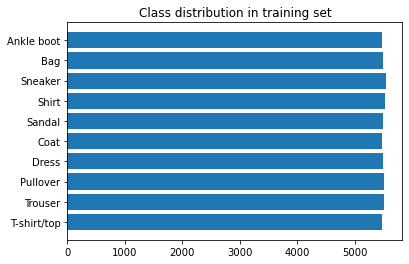

In [ ]:
# Check distribution of classes in dataset
classes_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

classes, counts = np.unique(y_train, return_counts=True)

# Plot bar graph
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

In [ ]:
#This is used to plot my loss vs val loss and accuracy vs val accuracy graphs
def plot_graphs(history, metric, title):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.title(title)
    plt.show()

#Model creation, using fully connected hidden layers

In [ ]:
model1 = tf.keras.models.Sequential([
    # Reshape the input to have a shape of (28, 28, 1)
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    # Flatten the input to a 1D tensor
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # Output is 10 because we have 10 classes
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.Adam(),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

In [ ]:
history = model1.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 3s 1ms/step - loss: 1.5657 - accuracy: 0.7506 - val_loss: 0.5482 - val_accuracy: 0.8188
Epoch 2/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5365 - accuracy: 0.8188 - val_loss: 0.4898 - val_accuracy: 0.8372
Epoch 3/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4727 - accuracy: 0.8343 - val_loss: 0.5083 - val_accuracy: 0.8354
Epoch 4/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4531 - accuracy: 0.8426 - val_loss: 0.4232 - val_accuracy: 0.8506
Epoch 5/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4243 - accuracy: 0.8504 - val_loss: 0.4364 - val_accuracy: 0.8404


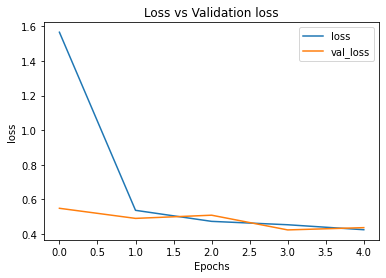

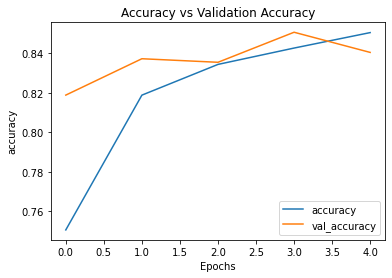

In [ ]:

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

This part of the code is used for predictions and to get the values to generate a confusion matrix

In [ ]:
y_pred1 = model1.predict(X_test)

y_pred1_classes = np.argmax(y_pred1, axis=1)

accuracy = np.mean(y_pred1_classes == y_test)
print('Accuracy:', accuracy)

test_loss1, test_accuracy1 = model1.evaluate(X_test, y_test)
print(test_loss1, test_accuracy1)

313/313 [==============================] - 0s 683us/step
Accuracy: 0.833
313/313 [==============================] - 0s 772us/step - loss: 0.4634 - accuracy: 0.8330
0.46339336037635803 0.8330000042915344


Used to print the confusion matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred1_classes)

# Print the confusion matrix
print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[655   5  17  62   5   3 240   0  13   0]
 [  0 961   6  27   3   1   2   0   0   0]
 [  5   0 693  13 146  15 124   0   4   0]
 [  3  15  18 885  33   0  43   0   3   0]
 [  0   3  92  39 773  14  77   0   2   0]
 [  0   0   0   0   0 944   0  28   2  26]
 [ 56   3  94  44  91   4 693   0  15   0]
 [  0   0   0   0   0  29   0 870   0 101]
 [  1   1   6   5   2   3  29   4 949   0]
 [  0   0   0   0   0  78   1  14   0 907]]


Using the confusion matrix print the accuracies per class

In [ ]:
row_sums = np.sum(conf_matrix, axis=1)
correct_percentages1 = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages1):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

Class 0: T-shirt/top 65.50%
Class 1: Trouser 96.10%
Class 2: Pullover 69.30%
Class 3: Dress 88.50%
Class 4: Coat 77.30%
Class 5: Sandal 94.40%
Class 6: Shirt 69.30%
Class 7: Sneaker 87.00%
Class 8: Bag 94.90%
Class 9: Ankle boot 90.70%


Model 2 Fully connected hidden layer with different neurons

In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Epoch 1/5
1719/1719 [==============================] - 4s 2ms/step - loss: 1.4456 - accuracy: 0.7593 - val_loss: 0.5225 - val_accuracy: 0.8226
Epoch 2/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5010 - accuracy: 0.8267 - val_loss: 0.4533 - val_accuracy: 0.8370
Epoch 3/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4413 - accuracy: 0.8442 - val_loss: 0.4204 - val_accuracy: 0.8534
Epoch 4/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4114 - accuracy: 0.8539 - val_loss: 0.4338 - val_accuracy: 0.8538
Epoch 5/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3951 - accuracy: 0.8591 - val_loss: 0.5067 - val_accuracy: 0.8290


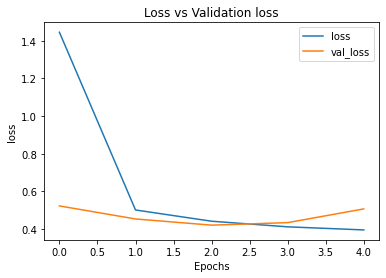

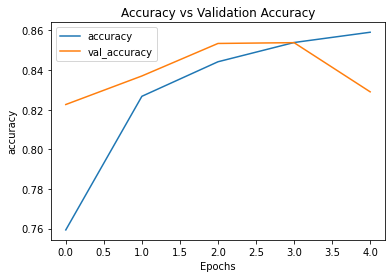

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

history = model2.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred2 = model2.predict(X_test)

y_pred2_classes = np.argmax(y_pred2, axis=1)

accuracy = np.mean(y_pred2_classes == y_test)
print('Accuracy:', accuracy)

test_loss2, test_accuracy2 = model2.evaluate(X_test, y_test)
print(test_loss2, test_accuracy2)
conf_matrix = confusion_matrix(y_test, y_pred2_classes)

row_sums = np.sum(conf_matrix, axis=1)
correct_percentages2 = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages2):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 0s 875us/step
Accuracy: 0.8242
313/313 [==============================] - 0s 952us/step - loss: 0.5288 - accuracy: 0.8242
0.5287854075431824 0.8241999745368958
Class 0: T-shirt/top 48.80%
Class 1: Trouser 95.80%
Class 2: Pullover 80.90%
Class 3: Dress 91.50%
Class 4: Coat 69.20%
Class 5: Sandal 91.30%
Class 6: Shirt 62.20%
Class 7: Sneaker 98.20%
Class 8: Bag 96.40%
Class 9: Ankle boot 89.90%


Model 3, Fully connected hidden layer with different neurons

Epoch 1/5
1719/1719 [==============================] - 2s 1ms/step - loss: 1.1536 - accuracy: 0.7011 - val_loss: 0.6681 - val_accuracy: 0.7676
Epoch 2/5
1719/1719 [==============================] - 2s 983us/step - loss: 0.6586 - accuracy: 0.7736 - val_loss: 0.6659 - val_accuracy: 0.7770
Epoch 3/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5570 - accuracy: 0.8056 - val_loss: 0.5945 - val_accuracy: 0.7856
Epoch 4/5
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4950 - accuracy: 0.8262 - val_loss: 0.4804 - val_accuracy: 0.8294
Epoch 5/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4626 - accuracy: 0.8371 - val_loss: 0.4383 - val_accuracy: 0.8392


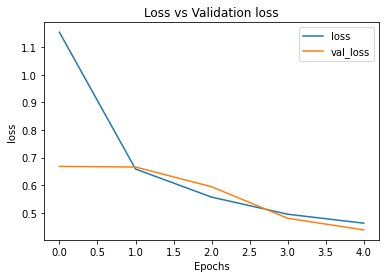

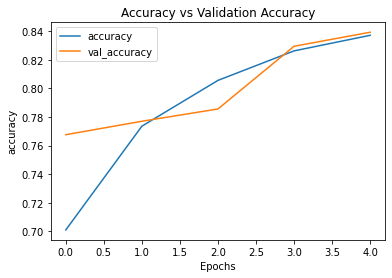

In [ ]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


model3.compile(optimizer=tf.keras.optimizers.Adam(),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

history = model3.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred3 = model3.predict(X_test)

y_pred3_classes = np.argmax(y_pred3, axis=1)

accuracy = np.mean(y_pred3_classes == y_test)
print('Accuracy:', accuracy)

test_loss3, test_accuracy3 = model3.evaluate(X_test, y_test)
print(test_loss3, test_accuracy3)

conf_matrix = confusion_matrix(y_test, y_pred3_classes)
row_sums = np.sum(conf_matrix, axis=1)
correct_percentages3 = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages3):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 0s 638us/step
Accuracy: 0.8329
313/313 [==============================] - 0s 673us/step - loss: 0.4746 - accuracy: 0.8329
0.4745810925960541 0.8328999876976013
Class 0: T-shirt/top 85.30%
Class 1: Trouser 96.50%
Class 2: Pullover 75.60%
Class 3: Dress 81.70%
Class 4: Coat 70.20%
Class 5: Sandal 92.20%
Class 6: Shirt 49.10%
Class 7: Sneaker 90.60%
Class 8: Bag 94.70%
Class 9: Ankle boot 97.00%


This is used to print all the accuracies from the three models. As we can see from the graph our best model is model 1. But each model had weak generlizations for shirt.

Also fully connected layers do not have enough feature extraction so this is not an optimal approach

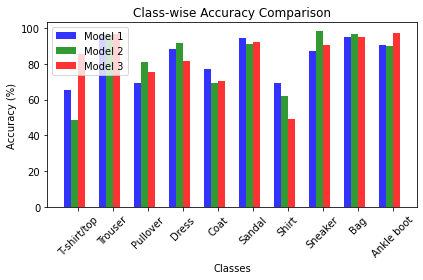

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



n_classes = len(classes_name)
bar_width = 0.2
opacity = 0.8
index = np.arange(n_classes)

# Plotting bars
plt.bar(index, correct_percentages1, bar_width, alpha=opacity, color='b', label='Model 1')
plt.bar(index + bar_width, correct_percentages2, bar_width, alpha=opacity, color='g', label='Model 2')
plt.bar(index + bar_width * 2, correct_percentages3, bar_width, alpha=opacity, color='r', label='Model 3')

# Customizing the plot
plt.xlabel('Classes')
plt.ylabel('Accuracy (%)')
plt.title('Class-wise Accuracy Comparison')
plt.xticks(index + bar_width * 1.5, classes_name, rotation=45)
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

#Testing only CNN networks with different kernel sizes

Model 4 uses a CNN with the same amount of neurons as model 1 and different kernal sizes

In [ ]:
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model4.compile(optimizer=tf.keras.optimizers.Adam(),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

history = model4.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

NameError: name 'model4' is not defined

There was a huge jump in accuracy. This is because kernels are used to extract features from an image.

In [ ]:
y_pred4 = model4.predict(X_test)

y_pred4_classes = np.argmax(y_pred4, axis=1)

accuracy = np.mean(y_pred4_classes == y_test)
print('Accuracy:', accuracy)

test_loss4, test_accuracy4 = model4.evaluate(X_test, y_test)
print(test_loss3, test_accuracy4)
conf_matrix = confusion_matrix(y_test, y_pred4_classes)

row_sums = np.sum(conf_matrix, axis=1)
correct_percentages4 = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages4):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 5s 15ms/step
Accuracy: 0.8938
313/313 [==============================] - 5s 16ms/step - loss: 0.3827 - accuracy: 0.8938
0.4745810925960541 0.8938000202178955
Class 0: T-shirt/top 83.20%
Class 1: Trouser 97.40%
Class 2: Pullover 81.00%
Class 3: Dress 90.00%
Class 4: Coat 85.10%
Class 5: Sandal 97.00%
Class 6: Shirt 71.10%
Class 7: Sneaker 96.40%
Class 8: Bag 97.70%
Class 9: Ankle boot 94.90%


Model 5 (3x3) (5x5) (3x3)

Epoch 1/5
1719/1719 [==============================] - 135s 78ms/step - loss: 0.6902 - accuracy: 0.8345 - val_loss: 0.3507 - val_accuracy: 0.8786
Epoch 2/5
1719/1719 [==============================] - 126s 73ms/step - loss: 0.3239 - accuracy: 0.8855 - val_loss: 0.3215 - val_accuracy: 0.8902
Epoch 3/5
1719/1719 [==============================] - 126s 74ms/step - loss: 0.2723 - accuracy: 0.9023 - val_loss: 0.3307 - val_accuracy: 0.8824
Epoch 4/5
1719/1719 [==============================] - 127s 74ms/step - loss: 0.2367 - accuracy: 0.9141 - val_loss: 0.3322 - val_accuracy: 0.8796
Epoch 5/5
1719/1719 [==============================] - 127s 74ms/step - loss: 0.2193 - accuracy: 0.9194 - val_loss: 0.3237 - val_accuracy: 0.8910


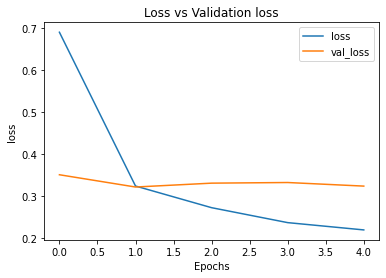

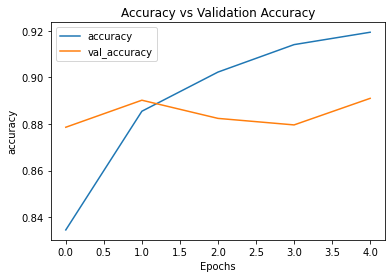

In [ ]:
model5 = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, kernel_size=(5, 5), activation='relu'),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model5.compile(optimizer=tf.keras.optimizers.Adam(),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

history = model5.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred5 = model5.predict(X_test)

y_pred5_classes = np.argmax(y_pred5, axis=1)

accuracy = np.mean(y_pred5_classes == y_test)
print('Accuracy:', accuracy)

test_loss5, test_accuracy5 = model5.evaluate(X_test, y_test)
print(test_loss5, test_accuracy5)

conf_matrix = confusion_matrix(y_test, y_pred5_classes)
row_sums = np.sum(conf_matrix, axis=1)
correct_percentages5 = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages5):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 5s 17ms/step
Accuracy: 0.8837
313/313 [==============================] - 6s 19ms/step - loss: 0.3626 - accuracy: 0.8837
0.3625786304473877 0.8837000131607056
Class 0: T-shirt/top 79.50%
Class 1: Trouser 97.90%
Class 2: Pullover 86.30%
Class 3: Dress 87.40%
Class 4: Coat 80.20%
Class 5: Sandal 97.00%
Class 6: Shirt 70.80%
Class 7: Sneaker 89.50%
Class 8: Bag 97.60%
Class 9: Ankle boot 97.50%


Model 6 (3x3) (3x3) (5x5)

Epoch 1/5
1719/1719 [==============================] - 186s 108ms/step - loss: 0.6139 - accuracy: 0.8434 - val_loss: 0.3829 - val_accuracy: 0.8660
Epoch 2/5
1719/1719 [==============================] - 190s 110ms/step - loss: 0.3162 - accuracy: 0.8872 - val_loss: 0.3383 - val_accuracy: 0.8816
Epoch 3/5
1719/1719 [==============================] - 192s 111ms/step - loss: 0.2703 - accuracy: 0.9026 - val_loss: 0.3319 - val_accuracy: 0.8858
Epoch 4/5
1719/1719 [==============================] - 186s 108ms/step - loss: 0.2397 - accuracy: 0.9126 - val_loss: 0.3687 - val_accuracy: 0.8794
Epoch 5/5
1719/1719 [==============================] - 179s 104ms/step - loss: 0.2115 - accuracy: 0.9231 - val_loss: 0.3769 - val_accuracy: 0.8800


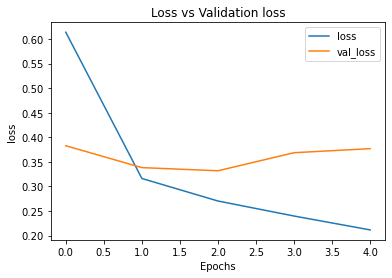

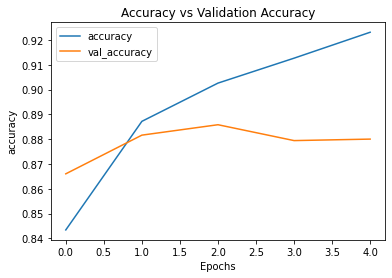

In [ ]:
model6 = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, kernel_size=(5, 5), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model6.compile(optimizer=tf.keras.optimizers.Adam(),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

history = model6.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred6 = model6.predict(X_test)

y_pred6_classes = np.argmax(y_pred6, axis=1)

accuracy = np.mean(y_pred6_classes == y_test)
print('Accuracy:', accuracy)

test_loss6, test_accuracy6 = model6.evaluate(X_test, y_test)
print(test_loss6, test_accuracy6)
conf_matrix = confusion_matrix(y_test, y_pred6_classes)

row_sums = np.sum(conf_matrix, axis=1)
correct_percentages6 = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages6):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 8s 26ms/step
Accuracy: 0.8793
313/313 [==============================] - 8s 26ms/step - loss: 0.3766 - accuracy: 0.8793
0.37659475207328796 0.8792999982833862
Class 0: T-shirt/top 79.50%
Class 1: Trouser 96.30%
Class 2: Pullover 85.90%
Class 3: Dress 92.10%
Class 4: Coat 72.70%
Class 5: Sandal 97.60%
Class 6: Shirt 68.60%
Class 7: Sneaker 98.00%
Class 8: Bag 97.10%
Class 9: Ankle boot 91.50%


Model 7 (3x3) (7x7) (3x3)

Epoch 1/5
1719/1719 [==============================] - 132s 77ms/step - loss: 0.7553 - accuracy: 0.7826 - val_loss: 0.4391 - val_accuracy: 0.8362
Epoch 2/5
1719/1719 [==============================] - 132s 77ms/step - loss: 0.3922 - accuracy: 0.8574 - val_loss: 0.3492 - val_accuracy: 0.8686
Epoch 3/5
1719/1719 [==============================] - 134s 78ms/step - loss: 0.3342 - accuracy: 0.8790 - val_loss: 0.3455 - val_accuracy: 0.8738
Epoch 4/5
1719/1719 [==============================] - 132s 77ms/step - loss: 0.2920 - accuracy: 0.8933 - val_loss: 0.3497 - val_accuracy: 0.8762
Epoch 5/5
1719/1719 [==============================] - 132s 77ms/step - loss: 0.2642 - accuracy: 0.9031 - val_loss: 0.3389 - val_accuracy: 0.8792


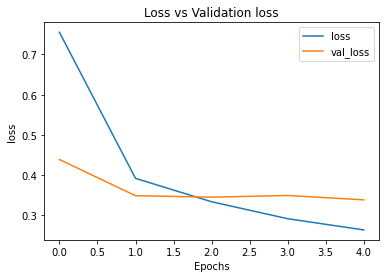

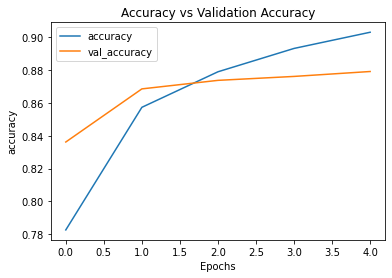

In [ ]:
model7 = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, kernel_size=(7, 7), activation='relu'),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model7.compile(optimizer=tf.keras.optimizers.Adam(),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

history = model7.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred7 = model7.predict(X_test)

y_pred7_classes = np.argmax(y_pred7, axis=1)

accuracy = np.mean(y_pred7_classes == y_test)
print('Accuracy:', accuracy)

test_loss7, test_accuracy7 = model7.evaluate(X_test, y_test)
print(test_loss7, test_accuracy7)
conf_matrix = confusion_matrix(y_test, y_pred7_classes)

row_sums = np.sum(conf_matrix, axis=1)
correct_percentages7 = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages7):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 6s 18ms/step
Accuracy: 0.8775
313/313 [==============================] - 6s 18ms/step - loss: 0.3711 - accuracy: 0.8775
0.37108397483825684 0.8774999976158142
Class 0: T-shirt/top 83.90%
Class 1: Trouser 95.60%
Class 2: Pullover 73.00%
Class 3: Dress 87.50%
Class 4: Coat 89.70%
Class 5: Sandal 98.00%
Class 6: Shirt 62.30%
Class 7: Sneaker 93.70%
Class 8: Bag 97.10%
Class 9: Ankle boot 96.70%


Model 5 (3x3) (3x3) (7x7)

Epoch 1/5
1719/1719 [==============================] - 278s 162ms/step - loss: 0.7165 - accuracy: 0.8318 - val_loss: 0.4128 - val_accuracy: 0.8484
Epoch 2/5
1719/1719 [==============================] - 270s 157ms/step - loss: 0.3404 - accuracy: 0.8784 - val_loss: 0.3368 - val_accuracy: 0.8766
Epoch 3/5
1719/1719 [==============================] - 274s 160ms/step - loss: 0.2843 - accuracy: 0.8965 - val_loss: 0.3372 - val_accuracy: 0.8836
Epoch 4/5
1719/1719 [==============================] - 284s 165ms/step - loss: 0.2408 - accuracy: 0.9140 - val_loss: 0.3485 - val_accuracy: 0.8890
Epoch 5/5
1719/1719 [==============================] - 261s 152ms/step - loss: 0.2089 - accuracy: 0.9253 - val_loss: 0.3583 - val_accuracy: 0.8820


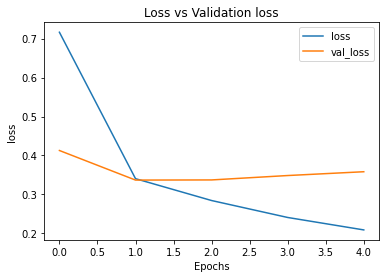

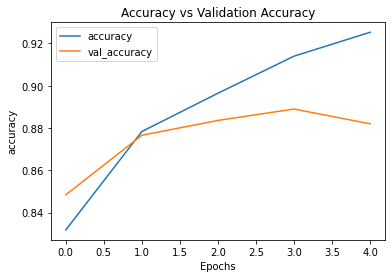

In [ ]:
model8 = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, kernel_size=(7, 7), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model8.compile(optimizer=tf.keras.optimizers.Adam(),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

history = model8.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred8 = model8.predict(X_test)

y_pred8_classes = np.argmax(y_pred8, axis=1)

accuracy = np.mean(y_pred8_classes == y_test)
print('Accuracy:', accuracy)

test_loss8, test_accuracy8 = model8.evaluate(X_test, y_test)
print(test_loss8, test_accuracy8)
conf_matrix = confusion_matrix(y_test, y_pred8_classes)

row_sums = np.sum(conf_matrix, axis=1)
correct_percentages8 = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages8):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 10s 33ms/step
Accuracy: 0.8841
313/313 [==============================] - 10s 31ms/step - loss: 0.3564 - accuracy: 0.8841
0.3564079701900482 0.8841000199317932
Class 0: T-shirt/top 87.30%
Class 1: Trouser 96.60%
Class 2: Pullover 79.10%
Class 3: Dress 86.10%
Class 4: Coat 87.20%
Class 5: Sandal 97.60%
Class 6: Shirt 63.70%
Class 7: Sneaker 93.30%
Class 8: Bag 96.90%
Class 9: Ankle boot 96.30%


Based on all the models, having a smaller kenerl sizes produced the best results this is because our image is a 28x28. Hence using small sizes is benefical. Our best model is model4

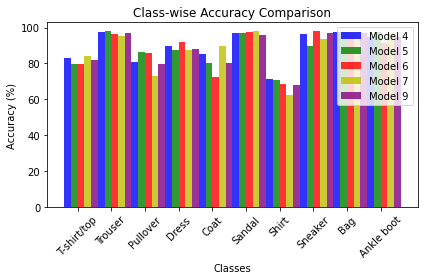

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



n_classes = len(classes_name)
bar_width = 0.2
opacity = 0.8
index = np.arange(n_classes)

# Plotting bars
plt.bar(index, correct_percentages4, bar_width, alpha=opacity, color='b', label='Model 4')
plt.bar(index + bar_width, correct_percentages5, bar_width, alpha=opacity, color='g', label='Model 5')
plt.bar(index + bar_width * 2, correct_percentages6, bar_width, alpha=opacity, color='r', label='Model 6')
plt.bar(index + bar_width * 3, correct_percentages7, bar_width, alpha=opacity, color='y', label='Model 7')
plt.bar(index + bar_width * 4, correct_percentages8, bar_width, alpha=opacity, color='purple', label='Model 9')

# Customizing the plot
plt.xlabel('Classes')
plt.ylabel('Accuracy (%)')
plt.title('Class-wise Accuracy Comparison')
plt.xticks(index + bar_width * 1.5, classes_name, rotation=45)
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

#Testing CNN and fully connected

Using the best CNN we found i added it with 128 neurons

Epoch 1/5
1719/1719 [==============================] - 117s 68ms/step - loss: 1.0308 - accuracy: 0.8527 - val_loss: 0.3247 - val_accuracy: 0.8808
Epoch 2/5
1719/1719 [==============================] - 114s 66ms/step - loss: 0.2415 - accuracy: 0.9104 - val_loss: 0.3109 - val_accuracy: 0.8936
Epoch 3/5
1719/1719 [==============================] - 114s 66ms/step - loss: 0.1750 - accuracy: 0.9349 - val_loss: 0.3190 - val_accuracy: 0.8930
Epoch 4/5
1719/1719 [==============================] - 115s 67ms/step - loss: 0.1313 - accuracy: 0.9517 - val_loss: 0.3797 - val_accuracy: 0.8880
Epoch 5/5
1719/1719 [==============================] - 119s 69ms/step - loss: 0.1037 - accuracy: 0.9631 - val_loss: 0.4344 - val_accuracy: 0.8868


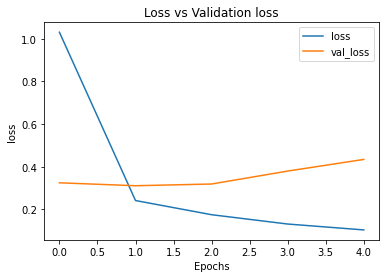

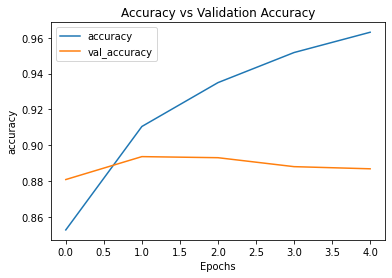

In [ ]:
model9 = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


model9.compile(optimizer=tf.keras.optimizers.Adam(),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

history = model9.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred9 = model9.predict(X_test)

y_pred9_classes = np.argmax(y_pred9, axis=1)

accuracy = np.mean(y_pred9_classes == y_test)
print('Accuracy:', accuracy)

test_loss9, test_accuracy9 = model9.evaluate(X_test, y_test)
print(test_loss9, test_accuracy9)

conf_matrix = confusion_matrix(y_test, y_pred9_classes)
row_sums = np.sum(conf_matrix, axis=1)
correct_percentages9 = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages9):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 3s 10ms/step
Accuracy: 0.8864
313/313 [==============================] - 3s 9ms/step - loss: 0.7573 - accuracy: 0.8864
0.7572952508926392 0.8863999843597412
Class 0: T-shirt/top 83.60%
Class 1: Trouser 96.70%
Class 2: Pullover 80.70%
Class 3: Dress 89.20%
Class 4: Coat 82.80%
Class 5: Sandal 96.40%
Class 6: Shirt 66.50%
Class 7: Sneaker 97.00%
Class 8: Bag 97.60%
Class 9: Ankle boot 95.90%


Testing to see if chagning the kernal size with dense layer makes any change. As we can see it doesn't and this method should not be used

Epoch 1/5
1719/1719 [==============================] - 142s 83ms/step - loss: 0.9295 - accuracy: 0.8179 - val_loss: 0.4165 - val_accuracy: 0.8430
Epoch 2/5
1719/1719 [==============================] - 132s 77ms/step - loss: 0.3544 - accuracy: 0.8702 - val_loss: 0.3668 - val_accuracy: 0.8688
Epoch 3/5
1719/1719 [==============================] - 130s 76ms/step - loss: 0.2857 - accuracy: 0.8933 - val_loss: 0.3621 - val_accuracy: 0.8766
Epoch 4/5
1719/1719 [==============================] - 130s 76ms/step - loss: 0.2368 - accuracy: 0.9105 - val_loss: 0.3878 - val_accuracy: 0.8704
Epoch 5/5
1719/1719 [==============================] - 134s 78ms/step - loss: 0.2066 - accuracy: 0.9235 - val_loss: 0.4066 - val_accuracy: 0.8790


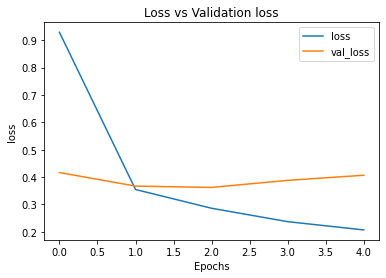

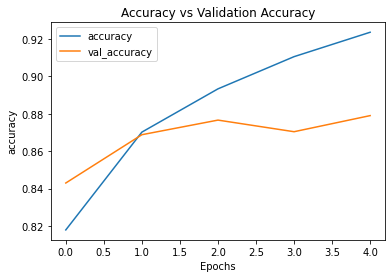

In [ ]:
model10 = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, kernel_size=(5, 5), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model10.compile(optimizer=tf.keras.optimizers.Adam(),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

history = model10.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred10 = model10.predict(X_test)

y_pred10_classes = np.argmax(y_pred10, axis=1)

accuracy = np.mean(y_pred10_classes == y_test)
print('Accuracy:', accuracy)

test_loss10, test_accuracy10 = model10.evaluate(X_test, y_test)
print(test_loss10, test_accuracy10)
conf_matrix = confusion_matrix(y_test, y_pred10_classes)

row_sums = np.sum(conf_matrix, axis=1)
correct_percentages10 = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages10):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 4s 12ms/step
Accuracy: 0.868
313/313 [==============================] - 4s 12ms/step - loss: 0.4565 - accuracy: 0.8680
0.45651522278785706 0.8679999709129333
Class 0: T-shirt/top 84.20%
Class 1: Trouser 96.10%
Class 2: Pullover 78.50%
Class 3: Dress 88.40%
Class 4: Coat 79.50%
Class 5: Sandal 95.70%
Class 6: Shirt 59.50%
Class 7: Sneaker 97.90%
Class 8: Bag 94.10%
Class 9: Ankle boot 94.10%


Epoch 1/5
1719/1719 [==============================] - 151s 88ms/step - loss: 0.7585 - accuracy: 0.8014 - val_loss: 0.4395 - val_accuracy: 0.8444
Epoch 2/5
1719/1719 [==============================] - 138s 80ms/step - loss: 0.3645 - accuracy: 0.8654 - val_loss: 0.3748 - val_accuracy: 0.8634
Epoch 3/5
1719/1719 [==============================] - 138s 80ms/step - loss: 0.2988 - accuracy: 0.8891 - val_loss: 0.3637 - val_accuracy: 0.8726
Epoch 4/5
1719/1719 [==============================] - 160s 93ms/step - loss: 0.2576 - accuracy: 0.9036 - val_loss: 0.3999 - val_accuracy: 0.8716
Epoch 5/5
1719/1719 [==============================] - 137s 79ms/step - loss: 0.2243 - accuracy: 0.9163 - val_loss: 0.3789 - val_accuracy: 0.8802


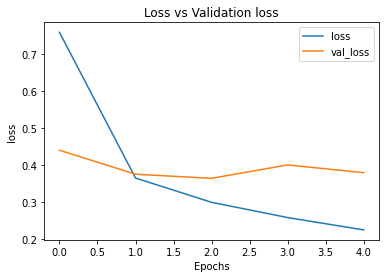

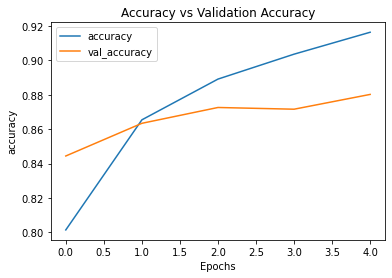

In [ ]:
model11 = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, kernel_size=(7, 7), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),  # Third hidden layer (Fully connected)
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer
])

model11.compile(optimizer=tf.keras.optimizers.Adam(),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

history = model11.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred11 = model11.predict(X_test)

y_pred11_classes = np.argmax(y_pred11, axis=1)

accuracy = np.mean(y_pred11_classes == y_test)
print('Accuracy:', accuracy)

test_loss11, test_accuracy11 = model11.evaluate(X_test, y_test)
print(test_loss11, test_accuracy11)

conf_matrix = confusion_matrix(y_test, y_pred11_classes)

# Print the confusion matrix
print('Confusion Matrix:\n', conf_matrix)

row_sums = np.sum(conf_matrix, axis=1)
correct_percentages11 = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages11):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 4s 12ms/step
Accuracy: 0.876
313/313 [==============================] - 4s 14ms/step - loss: 0.4241 - accuracy: 0.8760
0.424119770526886 0.8759999871253967
Confusion Matrix:
 [[861   3  23  27   2   1  76   0   7   0]
 [  5 971   0  18   2   0   2   0   2   0]
 [ 19   0 782   8 103   0  85   0   3   0]
 [ 21   6  15 914  22   1  20   0   0   1]
 [  3   1 114  34 794   1  52   0   1   0]
 [  0   0   0   0   0 973   0  20   0   7]
 [171   3  82  34  84   1 614   0  11   0]
 [  0   0   0   0   0  22   0 966   0  12]
 [  2   0  10   2   6   9  19   6 946   0]
 [  0   0   0   0   0   9   0  52   0 939]]
Class 0: T-shirt/top 86.10%
Class 1: Trouser 97.10%
Class 2: Pullover 78.20%
Class 3: Dress 91.40%
Class 4: Coat 79.40%
Class 5: Sandal 97.30%
Class 6: Shirt 61.40%
Class 7: Sneaker 96.60%
Class 8: Bag 94.60%
Class 9: Ankle boot 93.90%


In [ ]:
print(correct_percentages9)
print(correct_percentages10)
print(correct_percentages11)

[65.5 96.1 69.3 88.5 77.3 94.4 69.3 87.  94.9 90.7]
[65.5 96.1 69.3 88.5 77.3 94.4 69.3 87.  94.9 90.7]
[65.5 96.1 69.3 88.5 77.3 94.4 69.3 87.  94.9 90.7]


#Graphs for each model, they are worse compared to model 4

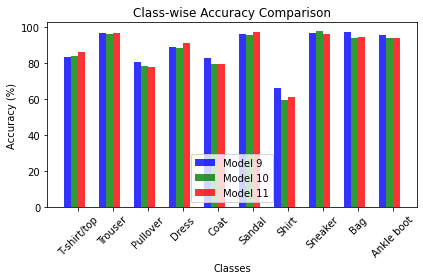

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



n_classes = len(classes_name)
bar_width = 0.2
opacity = 0.8
index = np.arange(n_classes)

# Plotting bars
plt.bar(index, correct_percentages9, bar_width, alpha=opacity, color='b', label='Model 9')
plt.bar(index + bar_width, correct_percentages10, bar_width, alpha=opacity, color='g', label='Model 10')
plt.bar(index + bar_width * 2, correct_percentages11, bar_width, alpha=opacity, color='r', label='Model 11')


# Customizing the plot
plt.xlabel('Classes')
plt.ylabel('Accuracy (%)')
plt.title('Class-wise Accuracy Comparison')
plt.xticks(index + bar_width * 1.5, classes_name, rotation=45)
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

#In conclusion having CNN and smaller kernel sizes product the best results but takes a lot of time. Compared to Fully connected and both. Since it takes a lot of time i decided to use maxpool tech such as averagepool, and maxpool and compare it to the original graph (model 4)

#Using multiple maxpools to figure out the best placement

Epoch 1/5
1719/1719 [==============================] - 21s 12ms/step - loss: 0.7699 - accuracy: 0.7948 - val_loss: 0.4289 - val_accuracy: 0.8448
Epoch 2/5
1719/1719 [==============================] - 19s 11ms/step - loss: 0.4135 - accuracy: 0.8494 - val_loss: 0.4234 - val_accuracy: 0.8538
Epoch 3/5
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3727 - accuracy: 0.8643 - val_loss: 0.3813 - val_accuracy: 0.8636
Epoch 4/5
1719/1719 [==============================] - 20s 12ms/step - loss: 0.3430 - accuracy: 0.8733 - val_loss: 0.3639 - val_accuracy: 0.8684
Epoch 5/5
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3215 - accuracy: 0.8816 - val_loss: 0.3391 - val_accuracy: 0.8772


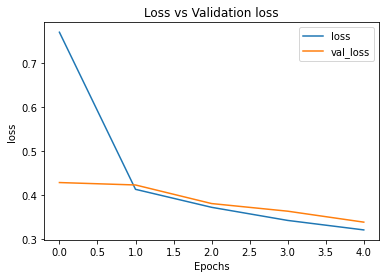

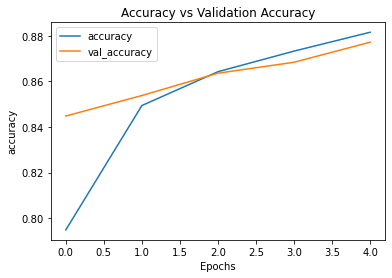

In [ ]:
model13 = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])


model13.compile(optimizer=tf.keras.optimizers.Adam(),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

history = model13.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred13 = model13.predict(X_test)

y_pred13_classes = np.argmax(y_pred13, axis=1)

accuracy = np.mean(y_pred13_classes == y_test)
print('Accuracy:', accuracy)

test_loss13, test_accuracy13 = model13.evaluate(X_test, y_test)
print(test_loss13, test_accuracy13)

conf_matrix = confusion_matrix(y_test, y_pred13_classes)
row_sums = np.sum(conf_matrix, axis=1)
correct_percentages13 = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages13):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 2s 5ms/step
Accuracy: 0.8695
313/313 [==============================] - 1s 4ms/step - loss: 0.3734 - accuracy: 0.8695
0.3734484612941742 0.8694999814033508
Class 0: T-shirt/top 80.40%
Class 1: Trouser 96.70%
Class 2: Pullover 76.90%
Class 3: Dress 85.70%
Class 4: Coat 79.00%
Class 5: Sandal 94.00%
Class 6: Shirt 67.50%
Class 7: Sneaker 97.10%
Class 8: Bag 96.90%
Class 9: Ankle boot 95.30%


Just a test to see a larger kernel, even though we know 3x3 3x3 3x3 is the best at this moment

Epoch 1/5
1719/1719 [==============================] - 43s 25ms/step - loss: 0.5912 - accuracy: 0.8283 - val_loss: 0.3375 - val_accuracy: 0.8740
Epoch 2/5
1719/1719 [==============================] - 42s 24ms/step - loss: 0.3302 - accuracy: 0.8804 - val_loss: 0.3215 - val_accuracy: 0.8790
Epoch 3/5
1719/1719 [==============================] - 41s 24ms/step - loss: 0.2898 - accuracy: 0.8958 - val_loss: 0.3485 - val_accuracy: 0.8730
Epoch 4/5
1719/1719 [==============================] - 43s 25ms/step - loss: 0.2703 - accuracy: 0.9026 - val_loss: 0.3227 - val_accuracy: 0.8826
Epoch 5/5
1719/1719 [==============================] - 42s 25ms/step - loss: 0.2420 - accuracy: 0.9119 - val_loss: 0.3031 - val_accuracy: 0.8950


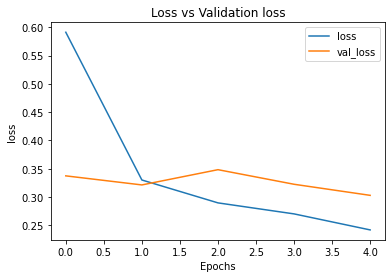

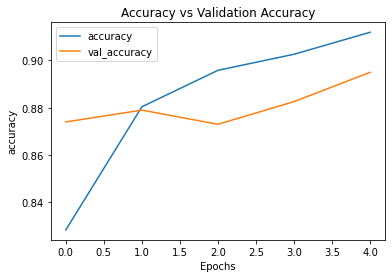

In [ ]:
model14 = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, kernel_size=(7, 7), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])


model14.compile(optimizer=tf.keras.optimizers.Adam(),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

history = model14.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred14 = model14.predict(X_test)

y_pred14_classes = np.argmax(y_pred14, axis=1)

accuracy = np.mean(y_pred14_classes == y_test)
print('Accuracy:', accuracy)

test_loss14, test_accuracy14 = model14.evaluate(X_test, y_test)
print(test_loss14, test_accuracy14)
conf_matrix = confusion_matrix(y_test, y_pred14_classes)

row_sums = np.sum(conf_matrix, axis=1)
correct_percentages14 = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages14):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 2s 6ms/step
Accuracy: 0.8858
313/313 [==============================] - 2s 7ms/step - loss: 0.3404 - accuracy: 0.8858
0.34040454030036926 0.8858000040054321
Class 0: T-shirt/top 85.60%
Class 1: Trouser 97.70%
Class 2: Pullover 78.70%
Class 3: Dress 87.90%
Class 4: Coat 84.80%
Class 5: Sandal 94.80%
Class 6: Shirt 66.90%
Class 7: Sneaker 96.70%
Class 8: Bag 97.30%
Class 9: Ankle boot 95.40%


#Placing a maxpool in the first CNN layer with 2x2

Epoch 1/5
1719/1719 [==============================] - 35s 20ms/step - loss: 0.4983 - accuracy: 0.8492 - val_loss: 0.3324 - val_accuracy: 0.8786
Epoch 2/5
1719/1719 [==============================] - 34s 20ms/step - loss: 0.3019 - accuracy: 0.8926 - val_loss: 0.3011 - val_accuracy: 0.8918
Epoch 3/5
1719/1719 [==============================] - 39s 22ms/step - loss: 0.2693 - accuracy: 0.9037 - val_loss: 0.2851 - val_accuracy: 0.9004
Epoch 4/5
1719/1719 [==============================] - 37s 21ms/step - loss: 0.2465 - accuracy: 0.9103 - val_loss: 0.2903 - val_accuracy: 0.8980
Epoch 5/5
1719/1719 [==============================] - 33s 19ms/step - loss: 0.2293 - accuracy: 0.9169 - val_loss: 0.3035 - val_accuracy: 0.8952


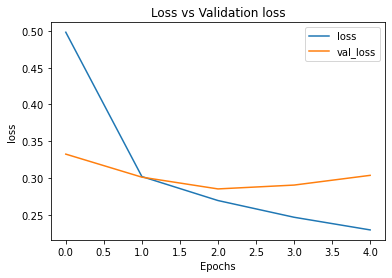

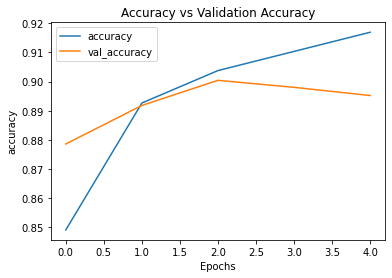

In [ ]:
model15 = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])


model15.compile(optimizer=tf.keras.optimizers.Adam(),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

history = model15.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred15 = model15.predict(X_test)

y_pred15_classes = np.argmax(y_pred15, axis=1)

accuracy = np.mean(y_pred15_classes == y_test)
print('Accuracy:', accuracy)

test_loss15, test_accuracy15 = model15.evaluate(X_test, y_test)
print(test_loss15, test_accuracy15)
conf_matrix = confusion_matrix(y_test, y_pred15_classes)

row_sums = np.sum(conf_matrix, axis=1)
correct_percentages15 = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages15):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 2s 6ms/step
Accuracy: 0.8883
313/313 [==============================] - 2s 7ms/step - loss: 0.3328 - accuracy: 0.8883
0.33276137709617615 0.8883000016212463
Class 0: T-shirt/top 81.70%
Class 1: Trouser 96.90%
Class 2: Pullover 84.40%
Class 3: Dress 90.40%
Class 4: Coat 83.50%
Class 5: Sandal 95.10%
Class 6: Shirt 65.50%
Class 7: Sneaker 95.70%
Class 8: Bag 98.70%
Class 9: Ankle boot 96.40%


Epoch 1/5
1719/1719 [==============================] - 35s 20ms/step - loss: 0.4634 - accuracy: 0.8479 - val_loss: 0.3353 - val_accuracy: 0.8758
Epoch 2/5
1719/1719 [==============================] - 32s 19ms/step - loss: 0.3021 - accuracy: 0.8912 - val_loss: 0.2844 - val_accuracy: 0.8936
Epoch 3/5
1719/1719 [==============================] - 31s 18ms/step - loss: 0.2618 - accuracy: 0.9064 - val_loss: 0.2973 - val_accuracy: 0.8932
Epoch 4/5
1719/1719 [==============================] - 32s 19ms/step - loss: 0.2360 - accuracy: 0.9146 - val_loss: 0.2714 - val_accuracy: 0.9008
Epoch 5/5
1719/1719 [==============================] - 31s 18ms/step - loss: 0.2178 - accuracy: 0.9200 - val_loss: 0.2896 - val_accuracy: 0.8990


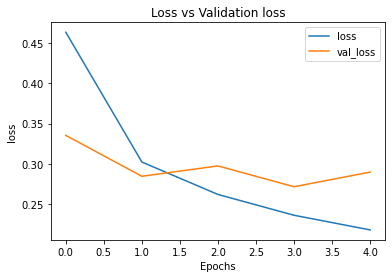

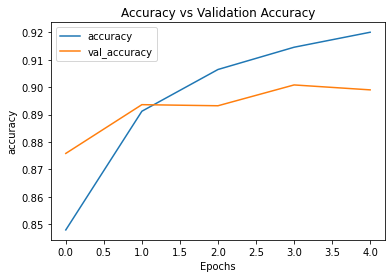

In [ ]:
model16 = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model16.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = model16.fit(X_train, y_train, epochs=5,
                      validation_data=(X_valid, y_valid))

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history, metric='accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred16 = model16.predict(X_test)

y_pred16_classes = np.argmax(y_pred16, axis=1)

accuracy = np.mean(y_pred16_classes == y_test)
print('Accuracy:', accuracy)

test_loss16, test_accuracy16 = model16.evaluate(X_test, y_test)
print(test_loss16, test_accuracy16)
conf_matrix = confusion_matrix(y_test, y_pred16_classes)

row_sums = np.sum(conf_matrix, axis=1)
correct_percentages16 = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages16):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 2s 7ms/step
Accuracy: 0.8946
313/313 [==============================] - 2s 6ms/step - loss: 0.3020 - accuracy: 0.8946
0.30201050639152527 0.894599974155426
Class 0: T-shirt/top 85.70%
Class 1: Trouser 97.30%
Class 2: Pullover 86.10%
Class 3: Dress 90.10%
Class 4: Coat 78.60%
Class 5: Sandal 98.00%
Class 6: Shirt 68.30%
Class 7: Sneaker 97.00%
Class 8: Bag 97.70%
Class 9: Ankle boot 95.80%


Epoch 1/5
1719/1719 [==============================] - 29s 16ms/step - loss: 0.5139 - accuracy: 0.8342 - val_loss: 0.3460 - val_accuracy: 0.8764
Epoch 2/5
1719/1719 [==============================] - 23s 13ms/step - loss: 0.3314 - accuracy: 0.8809 - val_loss: 0.3427 - val_accuracy: 0.8808
Epoch 3/5
1719/1719 [==============================] - 24s 14ms/step - loss: 0.3018 - accuracy: 0.8893 - val_loss: 0.3174 - val_accuracy: 0.8850
Epoch 4/5
1719/1719 [==============================] - 21s 12ms/step - loss: 0.2767 - accuracy: 0.8988 - val_loss: 0.3581 - val_accuracy: 0.8734
Epoch 5/5
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2603 - accuracy: 0.9031 - val_loss: 0.3064 - val_accuracy: 0.8892


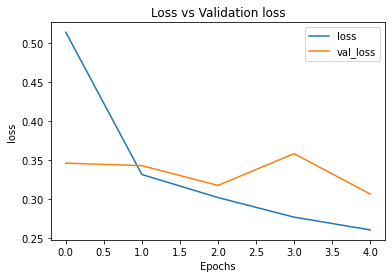

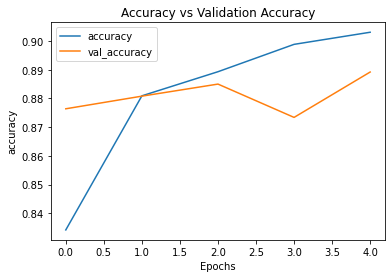

In [ ]:
model17 = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])


model17.compile(optimizer=tf.keras.optimizers.Adam(),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

history = model17.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred17 = model17.predict(X_test)

y_pred17_classes = np.argmax(y_pred17, axis=1)

accuracy = np.mean(y_pred17_classes == y_test)
print('Accuracy:', accuracy)

test_loss17, test_accuracy17 = model17.evaluate(X_test, y_test)
print(test_loss17, test_accuracy17)
conf_matrix = confusion_matrix(y_test, y_pred17_classes)

row_sums = np.sum(conf_matrix, axis=1)
correct_percentages17 = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages17):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 1s 4ms/step
Accuracy: 0.8846
313/313 [==============================] - 1s 4ms/step - loss: 0.3320 - accuracy: 0.8846
0.33198824524879456 0.8845999836921692
Class 0: T-shirt/top 79.10%
Class 1: Trouser 98.20%
Class 2: Pullover 82.30%
Class 3: Dress 88.80%
Class 4: Coat 74.60%
Class 5: Sandal 97.80%
Class 6: Shirt 74.30%
Class 7: Sneaker 95.00%
Class 8: Bag 97.80%
Class 9: Ankle boot 96.70%


#Based on these tests, having a maxpool decreases time complexitity, and having to many maxpools is not beneifical since we have a small image. So using a maxpool of 2x2 is good because it reduces the spital dimension to 7x7.

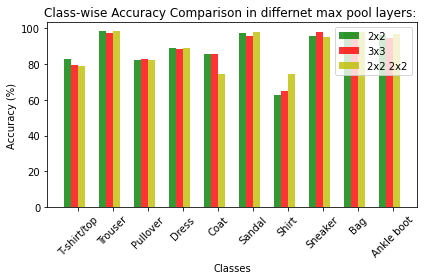

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



n_classes = len(classes_name)
bar_width = 0.2
opacity = 0.8
index = np.arange(n_classes)

# Plotting bars
#plt.bar(index, correct_percentages14, bar_width, alpha=opacity, color='b', label='2X2')
plt.bar(index, correct_percentages15, bar_width, alpha=opacity, color='g', label='No pool')
plt.bar(index + bar_width, correct_percentages15, bar_width, alpha=opacity, color='r', label='Max Pool')
plt.bar(index + bar_width * 2, correct_percentages16, bar_width, alpha=opacity, color='y', label='Average Pool')

# Customizing the plot
plt.xlabel('Classes')
plt.ylabel('Accuracy (%)')
plt.title('Class-wise Accuracy Comparison in differnet max pool layers: ')
plt.xticks(index + bar_width * 1.5, classes_name, rotation=45)
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

In [ ]:
#Testing LR

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

The first test of LR will use LR without Scheulding it

Epoch 1/5
1719/1719 [==============================] - 33s 19ms/step - loss: 0.9991 - accuracy: 0.7918 - val_loss: 0.4623 - val_accuracy: 0.8364
Epoch 2/5
1719/1719 [==============================] - 36s 21ms/step - loss: 0.4944 - accuracy: 0.8215 - val_loss: 0.6147 - val_accuracy: 0.8026
Epoch 3/5
1719/1719 [==============================] - 36s 21ms/step - loss: 0.4978 - accuracy: 0.8180 - val_loss: 0.4892 - val_accuracy: 0.8280
Epoch 4/5
1719/1719 [==============================] - 34s 20ms/step - loss: 0.4890 - accuracy: 0.8230 - val_loss: 0.4858 - val_accuracy: 0.8144
Epoch 5/5
1719/1719 [==============================] - 31s 18ms/step - loss: 0.4762 - accuracy: 0.8255 - val_loss: 0.4648 - val_accuracy: 0.8382


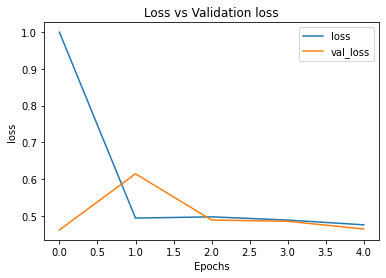

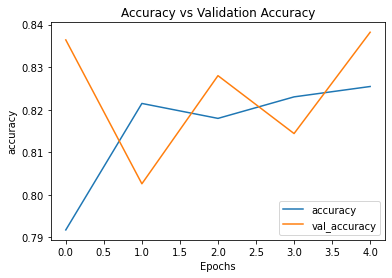

In [ ]:



model17_001 = tf.keras.models.clone_model(model16)



model17_001.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

history = model17_001.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred18 = model17_001.predict(X_test)

y_pred18_classes = np.argmax(y_pred18, axis=1)

accuracy = np.mean(y_pred18_classes == y_test)
print('Accuracy:', accuracy)

test_loss18, test_accuracy18 = model17_001.evaluate(X_test, y_test)
print(test_loss18, test_accuracy18)

conf_matrix = confusion_matrix(y_test, y_pred18_classes)

row_sums = np.sum(conf_matrix, axis=1)
correct_percentages18 = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages18):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 2s 7ms/step
Accuracy: 0.8196
313/313 [==============================] - 2s 7ms/step - loss: 0.5120 - accuracy: 0.8196
0.5120025873184204 0.819599986076355
Class 0: T-shirt/top 82.90%
Class 1: Trouser 93.50%
Class 2: Pullover 63.40%
Class 3: Dress 85.10%
Class 4: Coat 70.60%
Class 5: Sandal 97.30%
Class 6: Shirt 48.50%
Class 7: Sneaker 88.30%
Class 8: Bag 93.30%
Class 9: Ankle boot 96.70%


Changing lr to 0.0001

Epoch 1/5
1719/1719 [==============================] - 33s 19ms/step - loss: 0.6482 - accuracy: 0.8092 - val_loss: 0.4067 - val_accuracy: 0.8522
Epoch 2/5
1719/1719 [==============================] - 32s 19ms/step - loss: 0.3474 - accuracy: 0.8765 - val_loss: 0.3358 - val_accuracy: 0.8770
Epoch 3/5
1719/1719 [==============================] - 34s 20ms/step - loss: 0.2891 - accuracy: 0.8975 - val_loss: 0.3323 - val_accuracy: 0.8826
Epoch 4/5
1719/1719 [==============================] - 37s 22ms/step - loss: 0.2526 - accuracy: 0.9086 - val_loss: 0.3144 - val_accuracy: 0.8884
Epoch 5/5
1719/1719 [==============================] - 39s 22ms/step - loss: 0.2206 - accuracy: 0.9204 - val_loss: 0.3155 - val_accuracy: 0.8888


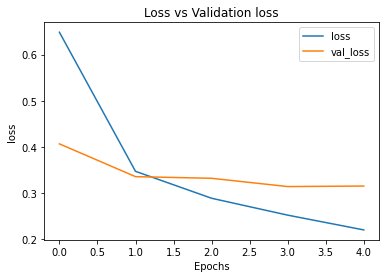

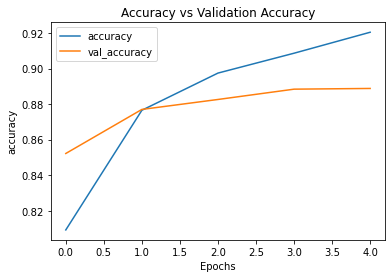

In [ ]:
model17_00001 = tf.keras.models.clone_model(model16)



model17_00001.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

history = model17_00001.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred19 = model17_00001.predict(X_test)

y_pred19_classes = np.argmax(y_pred19, axis=1)

accuracy = np.mean(y_pred19_classes == y_test)
print('Accuracy:', accuracy)

test_loss19, test_accuracy19 = model17_00001.evaluate(X_test, y_test)
print(test_loss19, test_accuracy19)
conf_matrix = confusion_matrix(y_test, y_pred19_classes)

row_sums = np.sum(conf_matrix, axis=1)


correct_percentages19 = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages19):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 2s 7ms/step
Accuracy: 0.8859
313/313 [==============================] - 2s 7ms/step - loss: 0.3242 - accuracy: 0.8859
0.32422369718551636 0.8859000205993652
Class 0: T-shirt/top 77.10%
Class 1: Trouser 96.50%
Class 2: Pullover 83.90%
Class 3: Dress 93.30%
Class 4: Coat 71.40%
Class 5: Sandal 96.60%
Class 6: Shirt 79.50%
Class 7: Sneaker 95.50%
Class 8: Bag 94.40%
Class 9: Ankle boot 97.70%


#As we compare the graphs having a lower lr performed better, than havning a higher lr

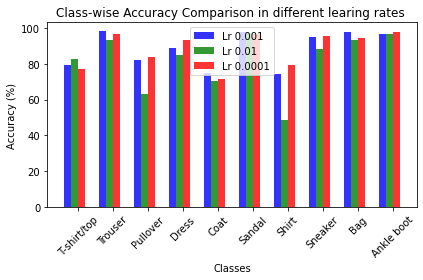

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



n_classes = len(classes_name)
bar_width = 0.2
opacity = 0.8
index = np.arange(n_classes)

# Plotting bars
plt.bar(index, correct_percentages17, bar_width, alpha=opacity, color='b', label='Lr 0.001')
plt.bar(index + bar_width, correct_percentages18, bar_width, alpha=opacity, color='g', label='Lr 0.01')
plt.bar(index + bar_width * 2, correct_percentages19, bar_width, alpha=opacity, color='r', label='Lr 0.0001')


# Customizing the plot
plt.xlabel('Classes')
plt.ylabel('Accuracy (%)')
plt.title('Class-wise Accuracy Comparison in different learing rates ')
plt.xticks(index + bar_width * 1.5, classes_name, rotation=45)
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

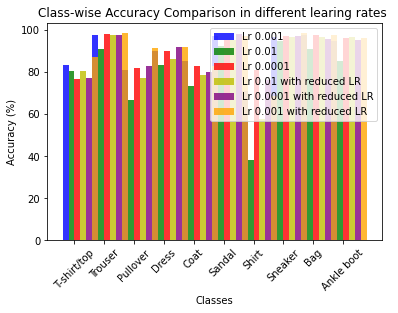

In [ ]:
# Accuracy values for each class with different learning rates
learning_rates = [0.001, 0.01, 0.0001, 0.01, 0.0001, 0.001]
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
accuracy_values = [[83.20, 97.40, 81.00, 90.00, 85.10, 97.00, 71.10, 96.40, 97.70, 94.90],
                   [80.30, 91.10, 66.70, 83.30, 73.20, 92.50, 38.10, 94.80, 90.90, 85.00],
                   [76.80, 97.90, 82.00, 90.00, 82.70, 95.10, 81.10, 97.20, 97.70, 95.90],
                   [80.50, 97.60, 77.00, 86.20, 78.60, 95.30, 57.70, 96.40, 96.50, 96.60],
                   [77.00, 97.50, 82.60, 91.80, 80.00, 98.00, 76.30, 97.00, 95.70, 95.40],
                   [87.00, 98.30, 91.30, 92.00, 82.90, 96.90, 68.30, 98.50, 97.70, 96.30]]

n_classes = len(classes_name)
bar_width = 0.2
opacity = 0.8
index = np.arange(n_classes)

# Plotting bars
plt.bar(index, accuracy_values[0], bar_width, alpha=opacity, color='b', label='Lr 0.001')
plt.bar(index + bar_width, accuracy_values[1], bar_width, alpha=opacity, color='g', label='Lr 0.01')
plt.bar(index + bar_width * 2, accuracy_values[2], bar_width, alpha=opacity, color='r', label='Lr 0.0001')
plt.bar(index + bar_width * 3, accuracy_values[3], bar_width, alpha=opacity, color='y', label='Lr 0.01 with reduced LR')
plt.bar(index + bar_width * 4, accuracy_values[4], bar_width, alpha=opacity, color='purple', label='Lr 0.0001 with reduced LR')
plt.bar(index + bar_width * 5, accuracy_values[5], bar_width, alpha=opacity, color='orange', label='Lr 0.001 with reduced LR')


# Customizing the plot
plt.xlabel('Classes')
plt.ylabel('Accuracy (%)')
plt.title('Class-wise Accuracy Comparison in different learing rates ')
plt.xticks(index + bar_width * 1.5, classes_name, rotation=45)
plt.legend()


In [ ]:
from keras.callbacks import ReduceLROnPlateau

#Testing reduced learing rate where after the first epoch if the val loss decreases it will change reduce the learning rate by 0.1 making it reach 0.0001 to be the finale LR

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, min_lr=0.00001)

Epoch 1/5
1719/1719 [==============================] - 36s 20ms/step - loss: 1.1004 - accuracy: 0.8135 - val_loss: 0.4470 - val_accuracy: 0.8360 - lr: 0.0100
Epoch 2/5
1719/1719 [==============================] - 34s 20ms/step - loss: 0.4619 - accuracy: 0.8309 - val_loss: 0.4795 - val_accuracy: 0.8216 - lr: 0.0100
Epoch 3/5
1719/1719 [==============================] - 33s 19ms/step - loss: 0.3660 - accuracy: 0.8637 - val_loss: 0.3695 - val_accuracy: 0.8644 - lr: 1.0000e-03
Epoch 4/5
1719/1719 [==============================] - 33s 19ms/step - loss: 0.3353 - accuracy: 0.8754 - val_loss: 0.3512 - val_accuracy: 0.8726 - lr: 1.0000e-03
Epoch 5/5
1719/1719 [==============================] - 39s 23ms/step - loss: 0.3203 - accuracy: 0.8801 - val_loss: 0.3415 - val_accuracy: 0.8696 - lr: 1.0000e-03


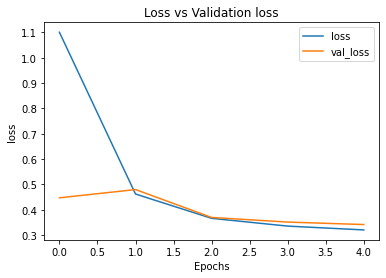

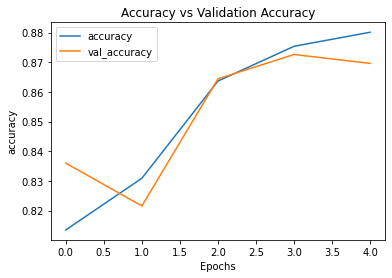

In [ ]:
model17_001_c = tf.keras.models.clone_model(model16)



model17_001_c.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

history = model17_001_c.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid), callbacks = reduce_lr)

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred19_c = model17_001_c.predict(X_test)

y_pred19_classes_c = np.argmax(y_pred19_c, axis=1)

accuracy = np.mean(y_pred19_classes_c == y_test)
print('Accuracy:', accuracy)

test_loss19_c, test_accuracy19_c = model17_001_c.evaluate(X_test, y_test)
print(test_loss19_c, test_accuracy19_c)
conf_matrix = confusion_matrix(y_test, y_pred19_classes_c)

row_sums = np.sum(conf_matrix, axis=1)


correct_percentages19_c = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages19_c):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 2s 6ms/step
Accuracy: 0.8624
313/313 [==============================] - 2s 6ms/step - loss: 0.3755 - accuracy: 0.8624
0.37552791833877563 0.8623999953269958
Class 0: T-shirt/top 80.50%
Class 1: Trouser 97.60%
Class 2: Pullover 77.00%
Class 3: Dress 86.20%
Class 4: Coat 78.60%
Class 5: Sandal 95.30%
Class 6: Shirt 57.70%
Class 7: Sneaker 96.40%
Class 8: Bag 96.50%
Class 9: Ankle boot 96.60%


Epoch 1/5
1719/1719 [==============================] - 39s 22ms/step - loss: 0.6594 - accuracy: 0.8104 - val_loss: 0.3825 - val_accuracy: 0.8626 - lr: 1.0000e-04
Epoch 2/5
1719/1719 [==============================] - 36s 21ms/step - loss: 0.3473 - accuracy: 0.8769 - val_loss: 0.3372 - val_accuracy: 0.8782 - lr: 1.0000e-04
Epoch 3/5
1719/1719 [==============================] - 39s 23ms/step - loss: 0.2883 - accuracy: 0.8954 - val_loss: 0.3354 - val_accuracy: 0.8804 - lr: 1.0000e-04
Epoch 4/5
1719/1719 [==============================] - 35s 21ms/step - loss: 0.2500 - accuracy: 0.9098 - val_loss: 0.3023 - val_accuracy: 0.8928 - lr: 1.0000e-04
Epoch 5/5
1719/1719 [==============================] - 35s 20ms/step - loss: 0.2205 - accuracy: 0.9200 - val_loss: 0.3008 - val_accuracy: 0.8898 - lr: 1.0000e-04


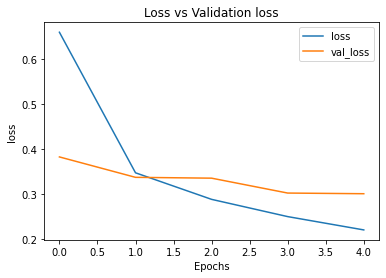

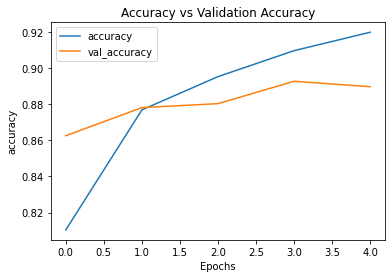

In [ ]:
model17_00001_c = tf.keras.models.clone_model(model16)



model17_00001_c.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

history = model17_00001_c.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid), callbacks = reduce_lr)

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred19_cc = model17_00001_c.predict(X_test)

y_pred19_classes_cc = np.argmax(y_pred19_cc, axis=1)

accuracy = np.mean(y_pred19_classes_cc == y_test)
print('Accuracy:', accuracy)

test_loss19_cc, test_accuracy19_cc = model17_00001_c.evaluate(X_test, y_test)
print(test_loss19_cc, test_accuracy19_cc)
conf_matrix = confusion_matrix(y_test, y_pred19_classes_cc)

row_sums = np.sum(conf_matrix, axis=1)


correct_percentages19_cc = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages19_cc):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 2s 7ms/step
Accuracy: 0.8913
313/313 [==============================] - 2s 6ms/step - loss: 0.3149 - accuracy: 0.8913
0.31488290429115295 0.8913000226020813
Class 0: T-shirt/top 77.00%
Class 1: Trouser 97.50%
Class 2: Pullover 82.60%
Class 3: Dress 91.80%
Class 4: Coat 80.00%
Class 5: Sandal 98.00%
Class 6: Shirt 76.30%
Class 7: Sneaker 97.00%
Class 8: Bag 95.70%
Class 9: Ankle boot 95.40%


Epoch 1/5
1719/1719 [==============================] - 35s 20ms/step - loss: 0.5841 - accuracy: 0.8384 - val_loss: 0.3551 - val_accuracy: 0.8726 - lr: 0.0010
Epoch 2/5
1719/1719 [==============================] - 37s 21ms/step - loss: 0.3181 - accuracy: 0.8860 - val_loss: 0.3121 - val_accuracy: 0.8866 - lr: 0.0010
Epoch 3/5
1719/1719 [==============================] - 34s 20ms/step - loss: 0.2770 - accuracy: 0.8995 - val_loss: 0.3210 - val_accuracy: 0.8896 - lr: 0.0010
Epoch 4/5
1719/1719 [==============================] - 36s 21ms/step - loss: 0.1880 - accuracy: 0.9315 - val_loss: 0.2677 - val_accuracy: 0.9078 - lr: 1.0000e-04
Epoch 5/5
1719/1719 [==============================] - 45s 26ms/step - loss: 0.1604 - accuracy: 0.9421 - val_loss: 0.2662 - val_accuracy: 0.9126 - lr: 1.0000e-04


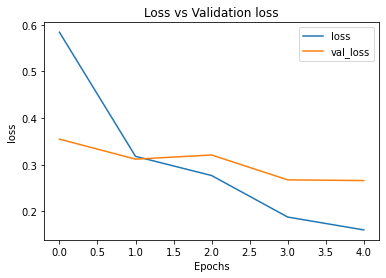

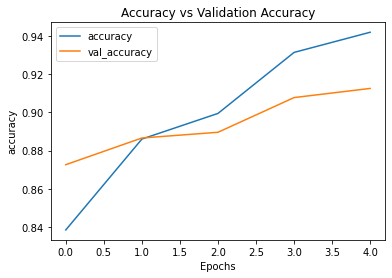

In [ ]:
model17_d_c = tf.keras.models.clone_model(model16)



model17_d_c.compile(optimizer=tf.keras.optimizers.Adam(),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

history = model17_d_c.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid), callbacks = reduce_lr)

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred19_ccc = model17_d_c.predict(X_test)

y_pred19_classes_ccc = np.argmax(y_pred19_ccc, axis=1)

accuracy = np.mean(y_pred19_classes_ccc == y_test)
print('Accuracy:', accuracy)

test_loss19_ccc, test_accuracy19_ccc = model17_d_c.evaluate(X_test, y_test)
print(test_loss19_ccc, test_accuracy19_ccc)
conf_matrix = confusion_matrix(y_test, y_pred19_classes_ccc)

row_sums = np.sum(conf_matrix, axis=1)


correct_percentages19_ccc = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages19_ccc):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 2s 7ms/step
Accuracy: 0.9092
313/313 [==============================] - 2s 7ms/step - loss: 0.2665 - accuracy: 0.9092
0.26646605134010315 0.9092000126838684
Class 0: T-shirt/top 87.00%
Class 1: Trouser 98.30%
Class 2: Pullover 91.30%
Class 3: Dress 92.00%
Class 4: Coat 82.90%
Class 5: Sandal 96.90%
Class 6: Shirt 68.30%
Class 7: Sneaker 98.50%
Class 8: Bag 97.70%
Class 9: Ankle boot 96.30%


#Based on the output we can see a very import change in the accuracy when using learning rate scehulars. This is quite vital as it is the first big jump in improving the overall performance of our model. Before 0.0001 was the best LR now it is the default lr in adam. We can see a significant change in val loss as the model is not overfitting in comparsion to the previous LR

Future work could be the use of different lr, nothing to low because it will cause the model to be slow. Change in patiences can help, by this means you would need to increase the epoch size.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



n_classes = len(classes_name)
bar_width = 0.2
opacity = 0.8
index = np.arange(n_classes)

# Plotting bars
plt.bar(index, correct_percentages17, bar_width, alpha=opacity, color='b', label='Lr 0.001')
plt.bar(index + bar_width, correct_percentages18, bar_width, alpha=opacity, color='g', label='Lr 0.01')
plt.bar(index + bar_width * 2, correct_percentages19, bar_width, alpha=opacity, color='r', label='Lr 0.0001')
plt.bar(index, correct_percentages19_ccc, bar_width, alpha=opacity, color='y', label='Lr 0.001 with reduced')
plt.bar(index + bar_width, correct_percentages19_c, bar_width, alpha=opacity, color='purple', label='Lr 0.01 with reduced ')
plt.bar(index + bar_width * 2, correct_percentages19_ccc, bar_width, alpha=opacity, color='orange', label='Lr 0.0001 with reduced')



# Customizing the plot
plt.xlabel('Classes')
plt.ylabel('Accuracy (%)')
plt.title('Class-wise Accuracy Comparison in different learing rates ')
plt.xticks(index + bar_width * 1.5, classes_name, rotation=45)
plt.legend()
#Figure 5 in the appendix
# Displaying the plot
plt.tight_layout()
plt.show()

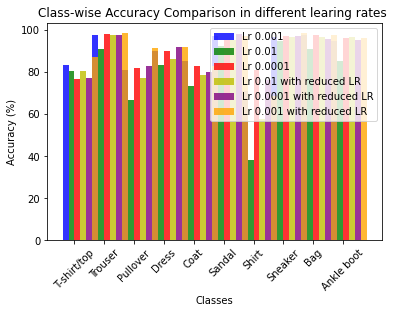

#Adding L2 to reduce overfitting and increase performance
The L2 parameneters tested are 0.001, 0.0001, and 0.01 without the use of reduced LR so we dont get a biases answer. Hence we are using 0.0001 as it produced the best lr on data without reduced lr. Reduced Lr will be used on the final model

Epoch 1/5
1719/1719 [==============================] - 47s 27ms/step - loss: 0.7162 - accuracy: 0.8163 - val_loss: 0.4791 - val_accuracy: 0.8670
Epoch 2/5
1719/1719 [==============================] - 45s 26ms/step - loss: 0.4299 - accuracy: 0.8891 - val_loss: 0.4470 - val_accuracy: 0.8736
Epoch 3/5
1719/1719 [==============================] - 45s 26ms/step - loss: 0.3568 - accuracy: 0.9104 - val_loss: 0.4024 - val_accuracy: 0.8962
Epoch 4/5
1719/1719 [==============================] - 44s 25ms/step - loss: 0.3058 - accuracy: 0.9267 - val_loss: 0.3854 - val_accuracy: 0.8990
Epoch 5/5
1719/1719 [==============================] - 44s 26ms/step - loss: 0.2644 - accuracy: 0.9402 - val_loss: 0.3972 - val_accuracy: 0.8978


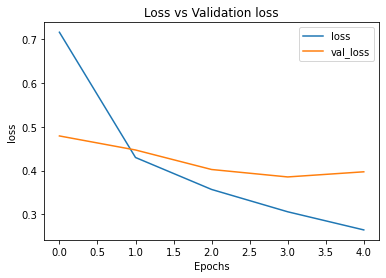

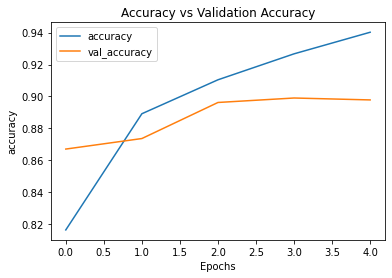

In [ ]:
model18 = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Conv2D(128, kernel_size=(7, 7), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])


model18.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

history = model18.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred20 = model18.predict(X_test)

y_pred20_classes = np.argmax(y_pred20, axis=1)

accuracy = np.mean(y_pred20_classes == y_test)
print('Accuracy:', accuracy)

test_loss20, test_accuracy20 = model18.evaluate(X_test, y_test)
print(test_loss20, test_accuracy20)

conf_matrix = confusion_matrix(y_test, y_pred20_classes)

print(conf_matrix)
row_sums = np.sum(conf_matrix, axis=1)
correct_percentages20 = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages20):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 2s 6ms/step
Accuracy: 0.8932
313/313 [==============================] - 2s 6ms/step - loss: 0.4272 - accuracy: 0.8932
0.42721763253211975 0.8931999802589417
[[882   0  24   9   5   5  70   1   3   1]
 [  3 978   0  10   3   1   1   0   4   0]
 [ 26   0 833   5  97   2  35   0   2   0]
 [ 42  12  18 830  70   0  24   0   3   1]
 [  3   0  48   8 905   1  34   0   1   0]
 [  0   0   0   0   0 982   0  14   0   4]
 [156   1  74  12 110   2 638   0   7   0]
 [  0   0   0   0   0  15   0 965   0  20]
 [  6   1   0   0   7  10   4   4 967   1]
 [  0   0   0   0   0  12   0  36   0 952]]
Class 0: T-shirt/top 88.20%
Class 1: Trouser 97.80%
Class 2: Pullover 83.30%
Class 3: Dress 83.00%
Class 4: Coat 90.50%
Class 5: Sandal 98.20%
Class 6: Shirt 63.80%
Class 7: Sneaker 96.50%
Class 8: Bag 96.70%
Class 9: Ankle boot 95.20%


Epoch 1/5
1719/1719 [==============================] - 44s 25ms/step - loss: 0.7239 - accuracy: 0.8104 - val_loss: 0.4409 - val_accuracy: 0.8604
Epoch 2/5
1719/1719 [==============================] - 43s 25ms/step - loss: 0.3412 - accuracy: 0.8840 - val_loss: 0.3578 - val_accuracy: 0.8780
Epoch 3/5
1719/1719 [==============================] - 44s 26ms/step - loss: 0.2708 - accuracy: 0.9091 - val_loss: 0.3194 - val_accuracy: 0.8926
Epoch 4/5
1719/1719 [==============================] - 43s 25ms/step - loss: 0.2263 - accuracy: 0.9237 - val_loss: 0.3039 - val_accuracy: 0.8966
Epoch 5/5
1719/1719 [==============================] - 44s 26ms/step - loss: 0.1894 - accuracy: 0.9370 - val_loss: 0.3081 - val_accuracy: 0.8992


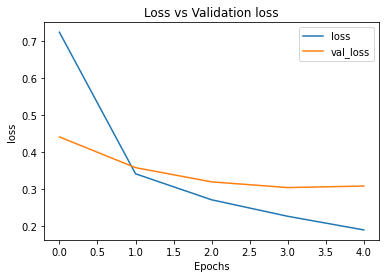

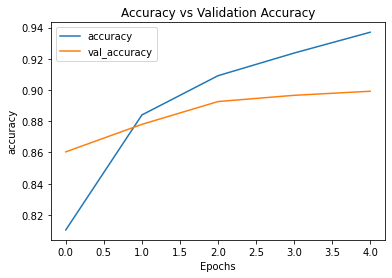

In [ ]:
model19 = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Conv2D(128, kernel_size=(7, 7), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])


model19.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

history = model19.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred21 = model19.predict(X_test)

y_pred21_classes = np.argmax(y_pred21, axis=1)

accuracy = np.mean(y_pred21_classes == y_test)
print('Accuracy:', accuracy)

test_loss21, test_accuracy21 = model19.evaluate(X_test, y_test)
print(test_loss21, test_accuracy21)
conf_matrix = confusion_matrix(y_test, y_pred20_classes)

print(conf_matrix)
row_sums = np.sum(conf_matrix, axis=1)


correct_percentages21 = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages21):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 2s 6ms/step
Accuracy: 0.8965
313/313 [==============================] - 2s 6ms/step - loss: 0.3236 - accuracy: 0.8965
0.3236350417137146 0.8964999914169312
[[882   0  24   9   5   5  70   1   3   1]
 [  3 978   0  10   3   1   1   0   4   0]
 [ 26   0 833   5  97   2  35   0   2   0]
 [ 42  12  18 830  70   0  24   0   3   1]
 [  3   0  48   8 905   1  34   0   1   0]
 [  0   0   0   0   0 982   0  14   0   4]
 [156   1  74  12 110   2 638   0   7   0]
 [  0   0   0   0   0  15   0 965   0  20]
 [  6   1   0   0   7  10   4   4 967   1]
 [  0   0   0   0   0  12   0  36   0 952]]
Class 0: T-shirt/top 88.20%
Class 1: Trouser 97.80%
Class 2: Pullover 83.30%
Class 3: Dress 83.00%
Class 4: Coat 90.50%
Class 5: Sandal 98.20%
Class 6: Shirt 63.80%
Class 7: Sneaker 96.50%
Class 8: Bag 96.70%
Class 9: Ankle boot 95.20%


Epoch 1/5
1719/1719 [==============================] - 49s 28ms/step - loss: 1.5490 - accuracy: 0.8229 - val_loss: 1.1680 - val_accuracy: 0.8642
Epoch 2/5
1719/1719 [==============================] - 46s 27ms/step - loss: 0.9770 - accuracy: 0.8871 - val_loss: 0.8695 - val_accuracy: 0.8850
Epoch 3/5
1719/1719 [==============================] - 45s 26ms/step - loss: 0.7352 - accuracy: 0.9041 - val_loss: 0.7102 - val_accuracy: 0.8936
Epoch 4/5
1719/1719 [==============================] - 42s 25ms/step - loss: 0.5888 - accuracy: 0.9155 - val_loss: 0.5944 - val_accuracy: 0.8992
Epoch 5/5
1719/1719 [==============================] - 42s 25ms/step - loss: 0.4978 - accuracy: 0.9220 - val_loss: 0.5279 - val_accuracy: 0.9072


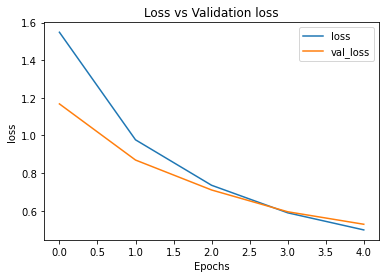

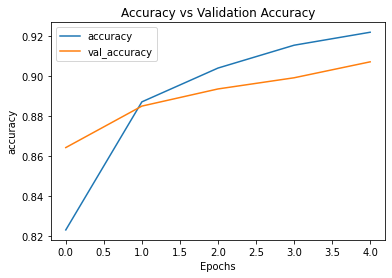

In [ ]:
model20 = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Conv2D(128, kernel_size=(7, 7), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])


model20.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

history = model20.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred22 = model20.predict(X_test)

y_pred22_classes = np.argmax(y_pred22, axis=1)

accuracy = np.mean(y_pred22_classes == y_test)
print('Accuracy:', accuracy)

test_loss22, test_accuracy22 = model20.evaluate(X_test, y_test)
print(test_loss22, test_accuracy22)

conf_matrix = confusion_matrix(y_test, y_pred20_classes)

print(conf_matrix)
row_sums = np.sum(conf_matrix, axis=1)
correct_percentages22 = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages22):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 2s 6ms/step
Accuracy: 0.8976
313/313 [==============================] - 2s 6ms/step - loss: 0.5397 - accuracy: 0.8976
0.5397167205810547 0.897599995136261
[[882   0  24   9   5   5  70   1   3   1]
 [  3 978   0  10   3   1   1   0   4   0]
 [ 26   0 833   5  97   2  35   0   2   0]
 [ 42  12  18 830  70   0  24   0   3   1]
 [  3   0  48   8 905   1  34   0   1   0]
 [  0   0   0   0   0 982   0  14   0   4]
 [156   1  74  12 110   2 638   0   7   0]
 [  0   0   0   0   0  15   0 965   0  20]
 [  6   1   0   0   7  10   4   4 967   1]
 [  0   0   0   0   0  12   0  36   0 952]]
Class 0: T-shirt/top 88.20%
Class 1: Trouser 97.80%
Class 2: Pullover 83.30%
Class 3: Dress 83.00%
Class 4: Coat 90.50%
Class 5: Sandal 98.20%
Class 6: Shirt 63.80%
Class 7: Sneaker 96.50%
Class 8: Bag 96.70%
Class 9: Ankle boot 95.20%


In [ ]:
print(test_loss20)
print(test_loss21)
print(test_loss22)

0.4103061556816101
0.32217612862586975
0.695210337638855


#This figure shows the loss and accuracy. As we can see 0.0001 is better than the others but has a similiar accuracy as 0.001 and a bigger loss. 0.001 seems to be better at generlizaing the data and would be better if we increase the number of epochs

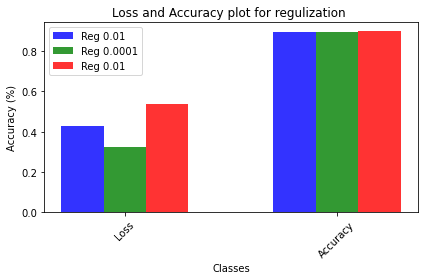

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


items = ["Loss", "Accuracy"]
index = np.arange(n_classes)
n_classes = len(items)
bar_width = 0.2
opacity = 0.8
index = np.arange(2)

# Plotting bars
plt.bar(index, [test_loss20, test_accuracy20], bar_width, alpha=opacity, color='b', label='Reg 0.01')
plt.bar(index + bar_width, [test_loss21, test_accuracy21], bar_width, alpha=opacity, color='g', label='Reg 0.0001')
plt.bar(index + bar_width * 2, [test_loss22, test_accuracy22], bar_width, alpha=opacity, color='r', label='Reg 0.01')


# Customizing the plot
plt.xlabel('Classes')
plt.ylabel('Accuracy (%)')
plt.title('Loss and Accuracy plot for regulization ')
plt.xticks([i + bar_width for i in index], items, rotation=45)
plt.legend()
# Figure 4 Appendix
# Displaying the plot
plt.tight_layout()
plt.show()

In [ ]:
#Testing dropout without l2

#Testing different dropout values such as 0.1, 0.2, and 0.03
In this test we do not use regulizartion or reduced l2 because we want to get unbiased values and understand the different.

Epoch 1/5
1719/1719 [==============================] - 50s 29ms/step - loss: 0.9000 - accuracy: 0.7202 - val_loss: 0.4540 - val_accuracy: 0.8346
Epoch 2/5
1719/1719 [==============================] - 49s 28ms/step - loss: 0.4575 - accuracy: 0.8308 - val_loss: 0.3478 - val_accuracy: 0.8658
Epoch 3/5
1719/1719 [==============================] - 48s 28ms/step - loss: 0.3659 - accuracy: 0.8664 - val_loss: 0.3063 - val_accuracy: 0.8872
Epoch 4/5
1719/1719 [==============================] - 56s 32ms/step - loss: 0.3099 - accuracy: 0.8879 - val_loss: 0.2749 - val_accuracy: 0.8996
Epoch 5/5
1719/1719 [==============================] - 52s 30ms/step - loss: 0.2716 - accuracy: 0.9012 - val_loss: 0.2541 - val_accuracy: 0.9038


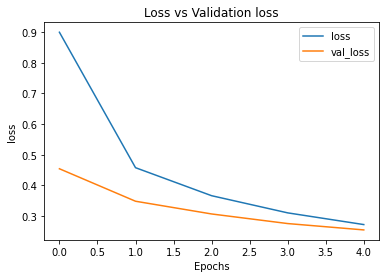

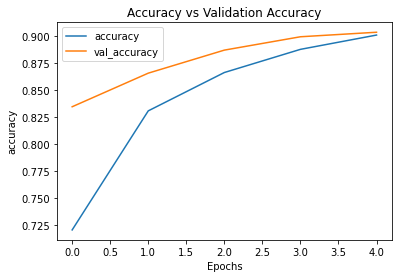

In [ ]:
model21 = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(128, kernel_size=(7, 7), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')
])


model21.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

history = model21.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred23 = model21.predict(X_test)

y_pred23_classes = np.argmax(y_pred23, axis=1)

accuracy = np.mean(y_pred23_classes == y_test)
print('Accuracy:', accuracy)

test_loss23, test_accuracy23 = model21.evaluate(X_test, y_test)
print(test_loss23, test_accuracy23)

conf_matrix = confusion_matrix(y_test, y_pred23_classes)

print(conf_matrix)
row_sums = np.sum(conf_matrix, axis=1)
correct_percentages23 = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages23):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 2s 6ms/step
Accuracy: 0.9
313/313 [==============================] - 2s 6ms/step - loss: 0.2783 - accuracy: 0.9000
0.27833402156829834 0.8999999761581421
[[848   0  16  18   3   2 103   0  10   0]
 [  2 968   0  21   2   0   4   0   3   0]
 [ 18   0 831   6  64   0  78   0   3   0]
 [  6   2  14 897  30   1  47   0   3   0]
 [  1   1  53  24 860   0  61   0   0   0]
 [  0   0   0   0   0 968   0  21   0  11]
 [103   0  60  24  85   0 716   0  12   0]
 [  0   0   0   0   0   7   0 968   0  25]
 [  2   0   4   4   4   2   5   4 974   1]
 [  1   0   0   0   0   4   0  25   0 970]]
Class 0: T-shirt/top 84.80%
Class 1: Trouser 96.80%
Class 2: Pullover 83.10%
Class 3: Dress 89.70%
Class 4: Coat 86.00%
Class 5: Sandal 96.80%
Class 6: Shirt 71.60%
Class 7: Sneaker 96.80%
Class 8: Bag 97.40%
Class 9: Ankle boot 97.00%


Epoch 1/5
1719/1719 [==============================] - 57s 33ms/step - loss: 1.3046 - accuracy: 0.6301 - val_loss: 0.5361 - val_accuracy: 0.7976
Epoch 2/5
1719/1719 [==============================] - 49s 28ms/step - loss: 0.5829 - accuracy: 0.7848 - val_loss: 0.4154 - val_accuracy: 0.8494
Epoch 3/5
1719/1719 [==============================] - 50s 29ms/step - loss: 0.4700 - accuracy: 0.8285 - val_loss: 0.3577 - val_accuracy: 0.8664
Epoch 4/5
1719/1719 [==============================] - 49s 29ms/step - loss: 0.4049 - accuracy: 0.8548 - val_loss: 0.3183 - val_accuracy: 0.8838
Epoch 5/5
1719/1719 [==============================] - 49s 29ms/step - loss: 0.3665 - accuracy: 0.8668 - val_loss: 0.2927 - val_accuracy: 0.8918


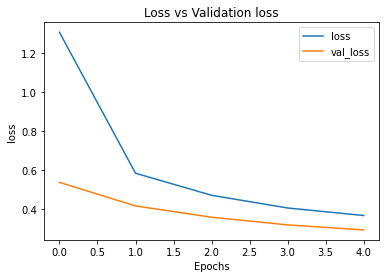

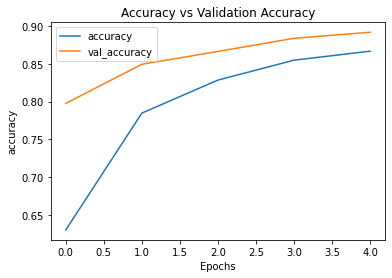

In [ ]:
model22 = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, kernel_size=(7, 7), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])


model22.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

history = model22.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred24 = model22.predict(X_test)

y_pred24_classes = np.argmax(y_pred24, axis=1)

accuracy = np.mean(y_pred24_classes == y_test)
print('Accuracy:', accuracy)

test_loss24, test_accuracy24 = model22.evaluate(X_test, y_test)
print(test_loss24, test_accuracy24)

conf_matrix = confusion_matrix(y_test, y_pred24_classes)

print(conf_matrix)
row_sums = np.sum(conf_matrix, axis=1)

correct_percentages24 = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages24):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 2s 6ms/step
Accuracy: 0.8848
313/313 [==============================] - 2s 6ms/step - loss: 0.3193 - accuracy: 0.8848
0.3193330466747284 0.8848000168800354
[[845   4  14  17   5   4 104   0   7   0]
 [  2 978   0  13   3   1   3   0   0   0]
 [ 19   1 777   8 103   1  91   0   0   0]
 [ 22  10   5 876  46   0  40   0   1   0]
 [  0   2  34  24 860   0  76   0   4   0]
 [  0   0   0   0   0 972   0  19   0   9]
 [121   2  63  27 118   0 660   0   9   0]
 [  0   0   0   0   0  12   0 957   0  31]
 [  1   0   6   2   7   3  10   5 966   0]
 [  0   0   1   1   0   7   0  34   0 957]]
Class 0: T-shirt/top 84.50%
Class 1: Trouser 97.80%
Class 2: Pullover 77.70%
Class 3: Dress 87.60%
Class 4: Coat 86.00%
Class 5: Sandal 97.20%
Class 6: Shirt 66.00%
Class 7: Sneaker 95.70%
Class 8: Bag 96.60%
Class 9: Ankle boot 95.70%


Epoch 1/5
1719/1719 [==============================] - 50s 29ms/step - loss: 2.8131 - accuracy: 0.3259 - val_loss: 1.3799 - val_accuracy: 0.5324
Epoch 2/5
1719/1719 [==============================] - 49s 28ms/step - loss: 1.1169 - accuracy: 0.5808 - val_loss: 0.7278 - val_accuracy: 0.7044
Epoch 3/5
1719/1719 [==============================] - 50s 29ms/step - loss: 0.7975 - accuracy: 0.6929 - val_loss: 0.5911 - val_accuracy: 0.7714
Epoch 4/5
1719/1719 [==============================] - 50s 29ms/step - loss: 0.6893 - accuracy: 0.7365 - val_loss: 0.5200 - val_accuracy: 0.7946
Epoch 5/5
1719/1719 [==============================] - 48s 28ms/step - loss: 0.6210 - accuracy: 0.7643 - val_loss: 0.4721 - val_accuracy: 0.8204


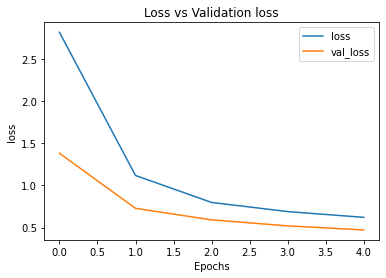

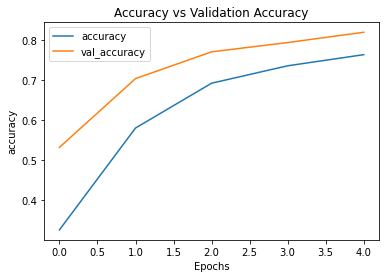

In [ ]:
model23 = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, kernel_size=(7, 7), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])


model23.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

history = model23.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred25 = model23.predict(X_test)

y_pred25_classes = np.argmax(y_pred25, axis=1)

accuracy = np.mean(y_pred25_classes == y_test)
print('Accuracy:', accuracy)

test_loss25, test_accuracy25 = model23.evaluate(X_test, y_test)
print(test_loss25, test_accuracy25)


conf_matrix = confusion_matrix(y_test, y_pred25_classes)

print(conf_matrix)
row_sums = np.sum(conf_matrix, axis=1)
correct_percentages25 = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages25):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 2s 5ms/step
Accuracy: 0.8119
313/313 [==============================] - 2s 6ms/step - loss: 0.4937 - accuracy: 0.8119
0.49372684955596924 0.8119000196456909
[[856   2  19  34   9   4  63   0  13   0]
 [  4 965   1  20   4   0   4   0   2   0]
 [ 24   1 684   7 232   0  41   0  11   0]
 [ 49  11   4 838  70   0  24   0   4   0]
 [  3   2 128  32 807   0  21   0   7   0]
 [  0   0   0   4   0 922   0  52   0  22]
 [255   1 237  33 238   0 204   0  32   0]
 [  0   0   0   0   0  17   0 940   0  43]
 [  1   2   1   1  14   9   5   3 962   2]
 [  0   0   0   0   0   4   0  54   1 941]]
Class 0: T-shirt/top 85.60%
Class 1: Trouser 96.50%
Class 2: Pullover 68.40%
Class 3: Dress 83.80%
Class 4: Coat 80.70%
Class 5: Sandal 92.20%
Class 6: Shirt 20.40%
Class 7: Sneaker 94.00%
Class 8: Bag 96.20%
Class 9: Ankle boot 94.10%


#Having higher number of dropouts is worse because to many neurons start to stop working. So having a lower dropout is good for this task

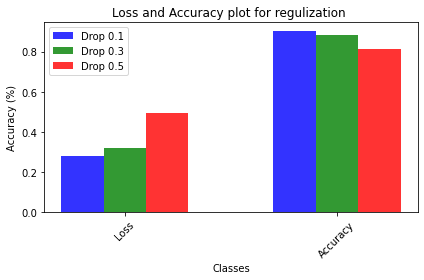

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


items = ["Loss", "Accuracy"]
index = np.arange(n_classes)
n_classes = len(items)
bar_width = 0.2
opacity = 0.8
index = np.arange(2)

# Plotting bars
plt.bar(index, [test_loss23, test_accuracy23], bar_width, alpha=opacity, color='b', label='Drop 0.1')
plt.bar(index + bar_width, [test_loss24, test_accuracy24], bar_width, alpha=opacity, color='g', label='Drop 0.2')
plt.bar(index + bar_width * 2, [test_loss25, test_accuracy25], bar_width, alpha=opacity, color='r', label='Drop 0.3')


# Customizing the plot
plt.xlabel('Classes')
plt.ylabel('Accuracy (%)')
plt.title('Loss and Accuracy plot for regulization ')
plt.xticks([i + bar_width for i in index], items, rotation=45)
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

In [ ]:
#Just like in this expirment it is hard to tell how the model will act. So i increased the epochs to 20 to test

In [ ]:
model24_test = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')
])

model24_test.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

history = model24_test.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred25_test7 = model24_test.predict(X_test)

y_pred25_classes_test7 = np.argmax(y_pred25_test7, axis=1)

accuracy = np.mean(y_pred25_classes_test7 == y_test)
print('Accuracy:', accuracy)

test_loss25_test7, test_accuracy25_test7 = model24_test.evaluate(X_test, y_test)
print(test_loss25_test7, test_accuracy25_test7)


row_sums = np.sum(conf_matrix, axis=1)
correct_percentages25_test7 = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages25_test7):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

#This test is used for different numbers of batch normalization layers. Batch normalization is used to normalize the input.

In [ ]:
#Test Norm

Epoch 1/5
1718/1719 [============================>.] - ETA: 0s - loss: 0.6535 - accuracy: 0.8232
Epoch 1: val_accuracy improved from -inf to 0.88640, saving model to model24_norm_batch32_best_accuracy.h5
1719/1719 [==============================] - 58s 34ms/step - loss: 0.6533 - accuracy: 0.8232 - val_loss: 0.4421 - val_accuracy: 0.8864
Epoch 2/5
1719/1719 [==============================] - ETA: 0s - loss: 0.4564 - accuracy: 0.8854
Epoch 2: val_accuracy improved from 0.88640 to 0.90260, saving model to model24_norm_batch32_best_accuracy.h5
1719/1719 [==============================] - 57s 33ms/step - loss: 0.4564 - accuracy: 0.8854 - val_loss: 0.4041 - val_accuracy: 0.9026
Epoch 3/5
1719/1719 [==============================] - ETA: 0s - loss: 0.3963 - accuracy: 0.9031
Epoch 3: val_accuracy did not improve from 0.90260
1719/1719 [==============================] - 57s 33ms/step - loss: 0.3963 - accuracy: 0.9031 - val_loss: 0.4029 - val_accuracy: 0.8982
Epoch 4/5
1718/1719 [===============

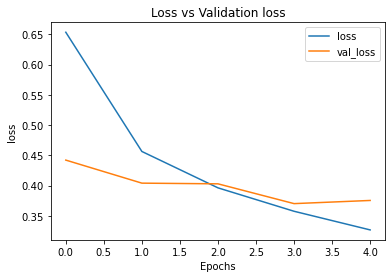

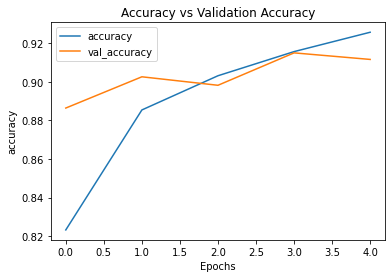

In [ ]:
model24_norm = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')
])


model24_norm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

checkpoint_path = "model24_norm_batch32_best_accuracy.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

history = model24_norm.fit(X_train, y_train, epochs=5, batch_size = 32,
                    validation_data=(X_valid, y_valid), callbacks=[checkpoint_callback])


plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred_norm1 = model24_norm.predict(X_test)

y_pred1_classes_norm = np.argmax(y_pred_norm1, axis=1)

accuracy = np.mean(y_pred1_classes_norm == y_test)
print('Accuracy:', accuracy)

test_loss1_norm, test_accuracy1_norm = model24_norm.evaluate(X_test, y_test)
print(test_loss1_norm, test_accuracy1_norm)

conf_matrix = confusion_matrix(y_test, y_pred1_classes_norm)

print(conf_matrix)
row_sums = np.sum(conf_matrix, axis=1)
correct_percentages1_norm = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages1_norm):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 3s 8ms/step
Accuracy: 0.9035
313/313 [==============================] - 3s 8ms/step - loss: 0.3966 - accuracy: 0.9035
0.39660826325416565 0.9035000205039978
[[895   1  26  15   2   1  48   0  12   0]
 [  2 978   2  12   2   0   3   0   1   0]
 [ 21   0 907   8  31   0  32   0   1   0]
 [ 21   4  17 906  27   0  23   0   2   0]
 [  0   0  93  28 837   0  40   0   2   0]
 [  0   0   0   0   0 948   0  38   0  14]
 [146   1  86  23  88   0 642   0  14   0]
 [  0   0   0   0   0   2   0 984   0  14]
 [  0   0   3   3   4   2   2   4 981   1]
 [  0   0   1   0   0   4   0  38   0 957]]
Class 0: T-shirt/top 89.50%
Class 1: Trouser 97.80%
Class 2: Pullover 90.70%
Class 3: Dress 90.60%
Class 4: Coat 83.70%
Class 5: Sandal 94.80%
Class 6: Shirt 64.20%
Class 7: Sneaker 98.40%
Class 8: Bag 98.10%
Class 9: Ankle boot 95.70%


Epoch 1/5
1719/1719 [==============================] - ETA: 0s - loss: 0.6441 - accuracy: 0.8220
Epoch 1: val_accuracy improved from -inf to 0.89160, saving model to model24_norm2_best_accuracy.h5
1719/1719 [==============================] - 54s 31ms/step - loss: 0.6441 - accuracy: 0.8220 - val_loss: 0.4342 - val_accuracy: 0.8916
Epoch 2/5
1718/1719 [============================>.] - ETA: 0s - loss: 0.4653 - accuracy: 0.8819
Epoch 2: val_accuracy improved from 0.89160 to 0.90320, saving model to model24_norm2_best_accuracy.h5
1719/1719 [==============================] - 52s 30ms/step - loss: 0.4653 - accuracy: 0.8819 - val_loss: 0.4000 - val_accuracy: 0.9032
Epoch 3/5
1718/1719 [============================>.] - ETA: 0s - loss: 0.4117 - accuracy: 0.8977
Epoch 3: val_accuracy did not improve from 0.90320
1719/1719 [==============================] - 51s 30ms/step - loss: 0.4117 - accuracy: 0.8977 - val_loss: 0.3840 - val_accuracy: 0.9028
Epoch 4/5
1719/1719 [=============================

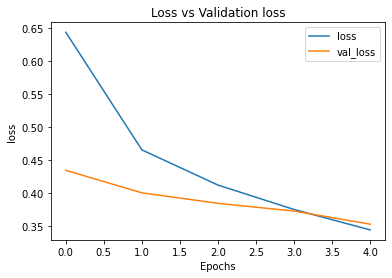

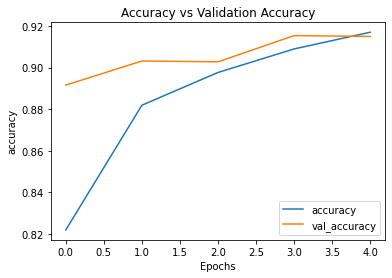

In [ ]:
model24_norm2 = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')
])


model24_norm2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')
checkpoint_path = "model24_norm2_best_accuracy.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

history = model24_norm2.fit(X_train, y_train, epochs=5, batch_size = 32,
                    validation_data=(X_valid, y_valid), callbacks=[checkpoint_callback])



plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred_norm2 = model24_norm2.predict(X_test)

y_pred1_classes_norm2 = np.argmax(y_pred_norm2, axis=1)

accuracy = np.mean(y_pred1_classes_norm2 == y_test)
print('Accuracy:', accuracy)

test_loss2_norm, test_accuracy2_norm = model24_norm2.evaluate(X_test, y_test)
print(test_loss2_norm, test_accuracy2_norm)

conf_matrix = confusion_matrix(y_test, y_pred1_classes_norm2)

print(conf_matrix)
row_sums = np.sum(conf_matrix, axis=1)
correct_percentages2_norm = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages2_norm):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 2s 6ms/step
Accuracy: 0.9077
313/313 [==============================] - 2s 6ms/step - loss: 0.3732 - accuracy: 0.9077
0.373234361410141 0.9077000021934509
[[869   3  22  13   6   4  76   0   7   0]
 [  0 978   0  15   3   0   2   0   2   0]
 [ 15   0 873   6  58   1  47   0   0   0]
 [ 13   5  17 886  38   0  41   0   0   0]
 [  1   1  37  20 900   0  41   0   0   0]
 [  1   0   0   0   0 974   0  19   0   6]
 [118   1  67  22  88   0 689   0  15   0]
 [  0   0   0   0   0   5   0 980   0  15]
 [  4   0   6   1   4   1   3   3 978   0]
 [  1   0   0   0   0   7   0  42   0 950]]
Class 0: T-shirt/top 86.90%
Class 1: Trouser 97.80%
Class 2: Pullover 87.30%
Class 3: Dress 88.60%
Class 4: Coat 90.00%
Class 5: Sandal 97.40%
Class 6: Shirt 68.90%
Class 7: Sneaker 98.00%
Class 8: Bag 97.80%
Class 9: Ankle boot 95.00%


Epoch 1/5
1718/1719 [============================>.] - ETA: 0s - loss: 0.6232 - accuracy: 0.8218
Epoch 1: val_accuracy improved from -inf to 0.87540, saving model to model24_norm3_best_accuracy.h5
1719/1719 [==============================] - 51s 29ms/step - loss: 0.6231 - accuracy: 0.8218 - val_loss: 0.4625 - val_accuracy: 0.8754
Epoch 2/5
1719/1719 [==============================] - ETA: 0s - loss: 0.4463 - accuracy: 0.8834
Epoch 2: val_accuracy improved from 0.87540 to 0.90500, saving model to model24_norm3_best_accuracy.h5
1719/1719 [==============================] - 51s 29ms/step - loss: 0.4463 - accuracy: 0.8834 - val_loss: 0.3895 - val_accuracy: 0.9050
Epoch 3/5
1718/1719 [============================>.] - ETA: 0s - loss: 0.3937 - accuracy: 0.9005
Epoch 3: val_accuracy improved from 0.90500 to 0.90720, saving model to model24_norm3_best_accuracy.h5
1719/1719 [==============================] - 51s 30ms/step - loss: 0.3937 - accuracy: 0.9005 - val_loss: 0.3681 - val_accuracy: 0.907

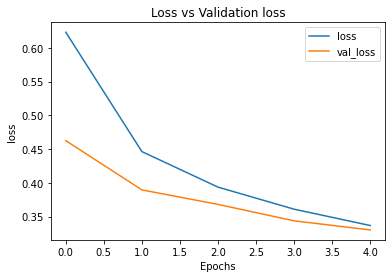

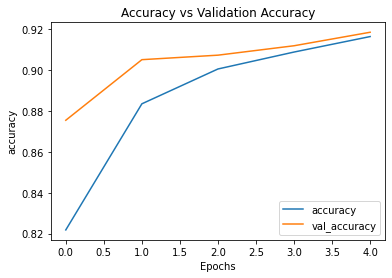

In [ ]:
model24_norm3 = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')
])


model24_norm3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')
checkpoint_path = "model24_norm3_best_accuracy.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

history = model24_norm3.fit(X_train, y_train, epochs=5, batch_size = 32,
                    validation_data=(X_valid, y_valid), callbacks=[checkpoint_callback])




plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred_norm3 = model24_norm3.predict(X_test)

y_pred1_classes_norm3 = np.argmax(y_pred_norm3, axis=1)

accuracy = np.mean(y_pred1_classes_norm3 == y_test)
print('Accuracy:', accuracy)

test_loss3_norm, test_accuracy3_norm = model24_norm3.evaluate(X_test, y_test)
print(test_loss3_norm, test_accuracy3_norm)

conf_matrix = confusion_matrix(y_test, y_pred1_classes_norm3)

print(conf_matrix)
row_sums = np.sum(conf_matrix, axis=1)
correct_percentages3_norm = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages3_norm):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 2s 6ms/step
Accuracy: 0.9085
313/313 [==============================] - 2s 6ms/step - loss: 0.3560 - accuracy: 0.9085
0.3559788465499878 0.9085000157356262
[[877   0  18   9   3   2  87   0   4   0]
 [  2 974   1  17   1   0   2   0   3   0]
 [ 20   1 863   7  46   0  63   0   0   0]
 [ 19   3  14 898  19   0  46   0   1   0]
 [  2   1  38  28 865   0  65   0   1   0]
 [  0   0   0   0   0 977   0  19   0   4]
 [104   1  57  19  72   0 741   0   6   0]
 [  0   0   0   0   0   6   0 983   0  11]
 [  6   0   5   1   6   3   4   5 970   0]
 [  1   0   0   0   0   6   0  56   0 937]]
Class 0: T-shirt/top 87.70%
Class 1: Trouser 97.40%
Class 2: Pullover 86.30%
Class 3: Dress 89.80%
Class 4: Coat 86.50%
Class 5: Sandal 97.70%
Class 6: Shirt 74.10%
Class 7: Sneaker 98.30%
Class 8: Bag 97.00%
Class 9: Ankle boot 93.70%


#Adding batchnorm helped us improve our accuracy and training time. Each batchnorm layer had similiar accuracies and loss

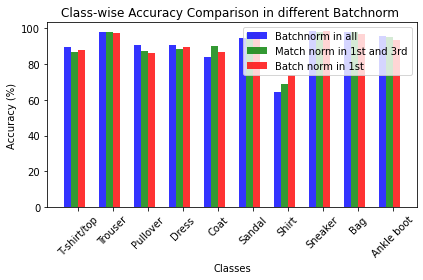

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



n_classes = len(classes_name)
bar_width = 0.2
opacity = 0.8
index = np.arange(n_classes)

# Plotting bars
plt.bar(index, correct_percentages1_norm, bar_width, alpha=opacity, color='b', label='Batchnorm in all')
plt.bar(index + bar_width, correct_percentages2_norm, bar_width, alpha=opacity, color='g', label='Match norm in 1st and 3rd')
plt.bar(index + bar_width * 2, correct_percentages3_norm, bar_width, alpha=opacity, color='r', label='Batch norm in 1st')


# Customizing the plot
plt.xlabel('Classes')
plt.ylabel('Accuracy (%)')
plt.title('Class-wise Accuracy Comparison in different Batchnorm ')
plt.xticks(index + bar_width * 1.5, classes_name, rotation=45)
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

#Since we our loss keeps on decreasing and does not tend to overfit that much we can use different number of epochs and batchsizes to find the best accuracy

In [ ]:
model28_2 = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')
])

model28_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

In [ ]:





checkpoint_path = "best_accuracy2.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

model28_2.fit(X_train, y_train, epochs=20,
              validation_data=(X_valid, y_valid),
              callbacks=[checkpoint_callback])

Epoch 1/20
1718/1719 [============================>.] - ETA: 0s - loss: 0.6358 - accuracy: 0.8194
Epoch 1: val_accuracy improved from -inf to 0.88940, saving model to best_accuracy2.h5
1719/1719 [==============================] - 55s 32ms/step - loss: 0.6356 - accuracy: 0.8194 - val_loss: 0.4396 - val_accuracy: 0.8894
Epoch 2/20
1718/1719 [============================>.] - ETA: 0s - loss: 0.4460 - accuracy: 0.8849
Epoch 2: val_accuracy improved from 0.88940 to 0.89100, saving model to best_accuracy2.h5
1719/1719 [==============================] - 54s 32ms/step - loss: 0.4460 - accuracy: 0.8849 - val_loss: 0.4062 - val_accuracy: 0.8910
Epoch 3/20
1719/1719 [==============================] - ETA: 0s - loss: 0.3882 - accuracy: 0.9020
Epoch 3: val_accuracy improved from 0.89100 to 0.90580, saving model to best_accuracy2.h5
1719/1719 [==============================] - 54s 31ms/step - loss: 0.3882 - accuracy: 0.9020 - val_loss: 0.3803 - val_accuracy: 0.9058
Epoch 4/20
1719/1719 [============

In [ ]:
y_pred30_2 = model28_2.predict(X_test)

y_pred30_classes_2 = np.argmax(y_pred30_2, axis=1)

accuracy = np.mean(y_pred30_2 == y_test)
print('Accuracy:', accuracy)

test_loss30_2, test_accuracy30_2 = model28_2.evaluate(X_test, y_test)
print(test_loss30_2, test_accuracy30_2)
conf_matrix = confusion_matrix(y_test, y_pred30_classes_2)
print('Confusion Matrix:\n', conf_matrix)
row_sums = np.sum(conf_matrix, axis=1)
correct_percentages30_2 = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages30_2):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 2s 7ms/step
Accuracy: 0.0
 24/313 [=>............................] - ETA: 2s - loss: 0.3037 - accuracy: 0.9310

<ipython-input-62-ca64399fa4a9>:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  accuracy = np.mean(y_pred30_2 == y_test)


313/313 [==============================] - 2s 7ms/step - loss: 0.2965 - accuracy: 0.9280
0.2964504361152649 0.9279999732971191
Confusion Matrix:
 [[908   1  10   9   3   1  64   0   4   0]
 [  4 981   1   9   2   0   2   0   1   0]
 [ 18   0 893   9  36   0  44   0   0   0]
 [ 16   4   9 935  13   0  23   0   0   0]
 [  2   1  36  33 881   0  47   0   0   0]
 [  0   0   0   0   0 984   0  11   0   5]
 [120   0  39  27  46   0 767   0   1   0]
 [  0   0   0   0   0   6   0 981   0  13]
 [  3   0   1   5   2   1   3   3 982   0]
 [  1   0   0   0   0   5   0  26   0 968]]
Class 0: T-shirt/top 90.80%
Class 1: Trouser 98.10%
Class 2: Pullover 89.30%
Class 3: Dress 93.50%
Class 4: Coat 88.10%
Class 5: Sandal 98.40%
Class 6: Shirt 76.70%
Class 7: Sneaker 98.10%
Class 8: Bag 98.20%
Class 9: Ankle boot 96.80%


In [ ]:
#model28_2.save(r'C:\Users\Asus\Desktop\New folder\model28_2_A0.9280.h5')

In [ ]:
model28_1 = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, kernel_size=(7, 7), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model28_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')




checkpoint_path = "best_accuracy.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

model28_1.fit(X_train, y_train, epochs=20,
              validation_data=(X_valid, y_valid),
              callbacks=[checkpoint_callback])

Epoch 1/20
1719/1719 [==============================] - ETA: 0s - loss: 0.6560 - accuracy: 0.8191
Epoch 1: val_accuracy improved from -inf to 0.88960, saving model to best_accuracy.h5
1719/1719 [==============================] - 57s 33ms/step - loss: 0.6560 - accuracy: 0.8191 - val_loss: 0.4429 - val_accuracy: 0.8896
Epoch 2/20
1718/1719 [============================>.] - ETA: 0s - loss: 0.4578 - accuracy: 0.8837
Epoch 2: val_accuracy improved from 0.88960 to 0.90780, saving model to best_accuracy.h5
1719/1719 [==============================] - 56s 32ms/step - loss: 0.4577 - accuracy: 0.8837 - val_loss: 0.3939 - val_accuracy: 0.9078
Epoch 3/20
1718/1719 [============================>.] - ETA: 0s - loss: 0.3930 - accuracy: 0.9050
Epoch 3: val_accuracy improved from 0.90780 to 0.91440, saving model to best_accuracy.h5
1719/1719 [==============================] - 56s 32ms/step - loss: 0.3931 - accuracy: 0.9049 - val_loss: 0.3693 - val_accuracy: 0.9144
Epoch 4/20
1719/1719 [===============

In [ ]:
y_pred30_1 = model28_1.predict(X_test)

y_pred30_classes_1 = np.argmax(y_pred30_1, axis=1)

accuracy = np.mean(y_pred30_1 == y_test)
print('Accuracy:', accuracy)

test_loss30_1, test_accuracy30_1 = model28_1.evaluate(X_test, y_test)
print(test_loss30_1, test_accuracy30_1)
conf_matrix = confusion_matrix(y_test, y_pred30_classes_1)
print('Confusion Matrix:\n', conf_matrix)
row_sums = np.sum(conf_matrix, axis=1)
correct_percentages30_1 = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages30_1):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 3s 8ms/step
Accuracy: 0.0
 15/313 [>.............................] - ETA: 2s - loss: 0.3316 - accuracy: 0.9250

<ipython-input-59-b85599163710>:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  accuracy = np.mean(y_pred30_1 == y_test)


313/313 [==============================] - 2s 8ms/step - loss: 0.3895 - accuracy: 0.9161
0.38953977823257446 0.916100025177002
Confusion Matrix:
 [[902   1  16   7   7   2  54   0  11   0]
 [  1 976   2  15   2   0   2   0   2   0]
 [ 17   0 850   9  85   0  38   0   1   0]
 [ 32   4  13 892  36   0  20   0   3   0]
 [  0   2  23  12 933   0  29   0   1   0]
 [  0   0   0   0   0 982   0  11   0   7]
 [130   1  47  19  90   0 710   0   3   0]
 [  0   0   0   0   0  14   0 971   0  15]
 [  2   0   3   1   3   4   3   1 983   0]
 [  1   0   0   0   0   8   0  29   0 962]]
Class 0: T-shirt/top 90.20%
Class 1: Trouser 97.60%
Class 2: Pullover 85.00%
Class 3: Dress 89.20%
Class 4: Coat 93.30%
Class 5: Sandal 98.20%
Class 6: Shirt 71.00%
Class 7: Sneaker 97.10%
Class 8: Bag 98.30%
Class 9: Ankle boot 96.20%


In [ ]:
#Batch

#Testing differnt amount of batch size: 16, 32, 64, and 128 on different number of epochs

Epoch 1/5
3437/3438 [============================>.] - ETA: 0s - loss: 0.5864 - accuracy: 0.8370
Epoch 1: val_accuracy improved from -inf to 0.89380, saving model to model24_norm2_batch16_best_accuracy.h5
3438/3438 [==============================] - 71s 21ms/step - loss: 0.5863 - accuracy: 0.8370 - val_loss: 0.4182 - val_accuracy: 0.8938
Epoch 2/5
3436/3438 [============================>.] - ETA: 0s - loss: 0.4150 - accuracy: 0.8934
Epoch 2: val_accuracy improved from 0.89380 to 0.90080, saving model to model24_norm2_batch16_best_accuracy.h5
3438/3438 [==============================] - 69s 20ms/step - loss: 0.4149 - accuracy: 0.8934 - val_loss: 0.3830 - val_accuracy: 0.9008
Epoch 3/5
3435/3438 [============================>.] - ETA: 0s - loss: 0.3638 - accuracy: 0.9088
Epoch 3: val_accuracy improved from 0.90080 to 0.91060, saving model to model24_norm2_batch16_best_accuracy.h5
3438/3438 [==============================] - 65s 19ms/step - loss: 0.3639 - accuracy: 0.9087 - val_loss: 0.35

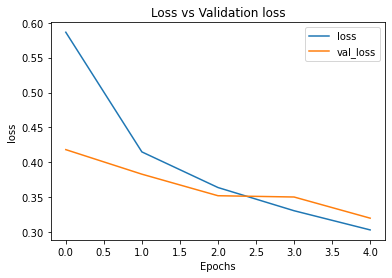

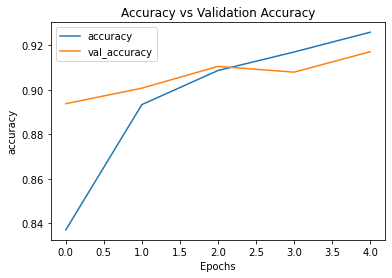

In [ ]:


model24_norm2_batch16 = tf.keras.models.clone_model(model28_2)


model24_norm2_batch16.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

checkpoint_path = "model24_norm2_batch16_best_accuracy.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train model24_norm2_batch16 with the checkpoint callback
history = model24_norm2_batch16.fit(X_train, y_train, epochs=5, batch_size = 16,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_callback])


plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred_norm4 = model24_norm2_batch16.predict(X_test)

y_pred1_classes_norm4 = np.argmax(y_pred_norm4, axis=1)

accuracy = np.mean(y_pred1_classes_norm4 == y_test)
print('Accuracy:', accuracy)

test_loss4_norm, test_accuracy4_norm = model24_norm2_batch16.evaluate(X_test, y_test)
print(test_loss4_norm, test_accuracy4_norm)

conf_matrix = confusion_matrix(y_test, y_pred1_classes_norm4)

print(conf_matrix)
row_sums = np.sum(conf_matrix, axis=1)
correct_percentages4_norm = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages4_norm):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 2s 7ms/step
Accuracy: 0.9126
313/313 [==============================] - 2s 7ms/step - loss: 0.3456 - accuracy: 0.9126
0.3455946445465088 0.9125999808311462
[[887   0  15  12   3   2  77   0   4   0]
 [  2 970   1  19   4   0   2   0   2   0]
 [ 17   0 904   8  29   0  41   0   1   0]
 [ 19   1  11 924  18   0  26   0   1   0]
 [  2   0  65  29 864   0  40   0   0   0]
 [  0   0   0   0   0 971   0  20   0   9]
 [112   0  71  24  82   0 698   0  13   0]
 [  0   0   0   0   0   4   0 986   0  10]
 [  2   0   2   4   3   1   1   4 983   0]
 [  0   0   1   0   0   4   0  56   0 939]]
Class 0: T-shirt/top 88.70%
Class 1: Trouser 97.00%
Class 2: Pullover 90.40%
Class 3: Dress 92.40%
Class 4: Coat 86.40%
Class 5: Sandal 97.10%
Class 6: Shirt 69.80%
Class 7: Sneaker 98.60%
Class 8: Bag 98.30%
Class 9: Ankle boot 93.90%


In [ ]:
#COME BACK h

Epoch 1/5
859/860 [============================>.] - ETA: 0s - loss: 0.7095 - accuracy: 0.7944
Epoch 1: val_accuracy improved from -inf to 0.87400, saving model to model24_norm2_batch64_best_accuracy.h5
860/860 [==============================] - 50s 57ms/step - loss: 0.7094 - accuracy: 0.7944 - val_loss: 0.4802 - val_accuracy: 0.8740
Epoch 2/5
859/860 [============================>.] - ETA: 0s - loss: 0.4865 - accuracy: 0.8708
Epoch 2: val_accuracy improved from 0.87400 to 0.89140, saving model to model24_norm2_batch64_best_accuracy.h5
860/860 [==============================] - 50s 58ms/step - loss: 0.4865 - accuracy: 0.8708 - val_loss: 0.4118 - val_accuracy: 0.8914
Epoch 3/5
859/860 [============================>.] - ETA: 0s - loss: 0.4227 - accuracy: 0.8921
Epoch 3: val_accuracy improved from 0.89140 to 0.89980, saving model to model24_norm2_batch64_best_accuracy.h5
860/860 [==============================] - 49s 57ms/step - loss: 0.4230 - accuracy: 0.8920 - val_loss: 0.3892 - val_acc

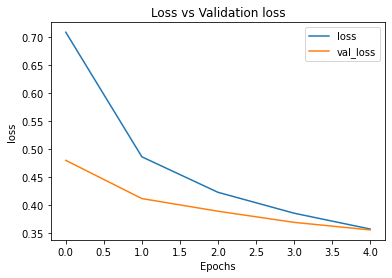

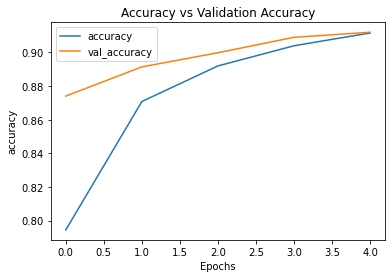

In [ ]:
model24_norm2_batch64 = tf.keras.models.clone_model(model28_2)


model24_norm2_batch64.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')


checkpoint_path = "model24_norm2_batch64_best_accuracy.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train model24_norm2_batch16 with the checkpoint callback
history = model24_norm2_batch64.fit(X_train, y_train, epochs=5, batch_size = 64,
                    validation_data=(X_valid, y_valid), callbacks=[checkpoint_callback])

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred_norm5 = model24_norm2_batch64.predict(X_test)

y_pred1_classes_norm5 = np.argmax(y_pred_norm5, axis=1)

accuracy = np.mean(y_pred1_classes_norm5 == y_test)
print('Accuracy:', accuracy)

test_loss5_norm, test_accuracy5_norm = model24_norm2_batch64.evaluate(X_test, y_test)
print(test_loss5_norm, test_accuracy5_norm)

conf_matrix = confusion_matrix(y_test, y_pred1_classes_norm5)

print(conf_matrix)
row_sums = np.sum(conf_matrix, axis=1)
correct_percentages5_norm = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages5_norm):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 2s 7ms/step
Accuracy: 0.9027
313/313 [==============================] - 2s 7ms/step - loss: 0.3764 - accuracy: 0.9027
0.37642911076545715 0.9027000069618225
[[922   2  13   8   3   0  44   0   8   0]
 [  2 972   1  20   2   0   1   0   2   0]
 [ 23   0 861  10  40   0  63   0   3   0]
 [ 23   8  11 923   9   0  24   0   2   0]
 [  1   4  60  43 811   0  79   0   2   0]
 [  0   0   0   0   0 964   0  24   0  12]
 [176   2  63  22  63   1 661   0  12   0]
 [  0   0   0   0   0   3   0 968   0  29]
 [  5   1   1   5   3   2   3   4 975   1]
 [  0   0   1   0   0   3   0  26   0 970]]
Class 0: T-shirt/top 92.20%
Class 1: Trouser 97.20%
Class 2: Pullover 86.10%
Class 3: Dress 92.30%
Class 4: Coat 81.10%
Class 5: Sandal 96.40%
Class 6: Shirt 66.10%
Class 7: Sneaker 96.80%
Class 8: Bag 97.50%
Class 9: Ankle boot 97.00%


Epoch 1/5
430/430 [==============================] - ETA: 0s - loss: 0.7453 - accuracy: 0.7842
Epoch 1: val_accuracy improved from -inf to 0.86620, saving model to model24_norm2_batch128_best_accuracy.h5
430/430 [==============================] - 44s 100ms/step - loss: 0.7453 - accuracy: 0.7842 - val_loss: 0.4924 - val_accuracy: 0.8662
Epoch 2/5
430/430 [==============================] - ETA: 0s - loss: 0.5020 - accuracy: 0.8664
Epoch 2: val_accuracy improved from 0.86620 to 0.89040, saving model to model24_norm2_batch128_best_accuracy.h5
430/430 [==============================] - 43s 100ms/step - loss: 0.5020 - accuracy: 0.8664 - val_loss: 0.4288 - val_accuracy: 0.8904
Epoch 3/5
430/430 [==============================] - ETA: 0s - loss: 0.4442 - accuracy: 0.8853
Epoch 3: val_accuracy improved from 0.89040 to 0.90440, saving model to model24_norm2_batch128_best_accuracy.h5
430/430 [==============================] - 43s 99ms/step - loss: 0.4442 - accuracy: 0.8853 - val_loss: 0.3962 - va

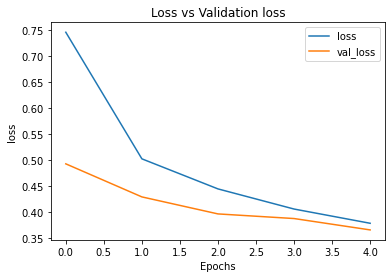

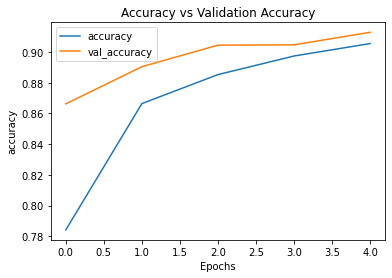

In [ ]:
model24_norm2_batch128 = tf.keras.models.clone_model(model28_2)


model24_norm2_batch128.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

checkpoint_path = "model24_norm2_batch128_best_accuracy.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

history = model24_norm2_batch128.fit(X_train, y_train, epochs=5, batch_size = 128,
                    validation_data=(X_valid, y_valid), callbacks=[checkpoint_callback])


plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred_norm6 = model24_norm2_batch128.predict(X_test)

y_pred1_classes_norm6= np.argmax(y_pred_norm6, axis=1)

accuracy = np.mean(y_pred1_classes_norm6 == y_test)
print('Accuracy:', accuracy)

test_loss6_norm, test_accuracy6_norm = model24_norm2_batch128.evaluate(X_test, y_test)
print(test_loss6_norm, test_accuracy6_norm)

conf_matrix = confusion_matrix(y_test, y_pred1_classes_norm6)

print(conf_matrix)
row_sums = np.sum(conf_matrix, axis=1)
correct_percentages6_norm = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages6_norm):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 2s 7ms/step
Accuracy: 0.9012
313/313 [==============================] - 2s 7ms/step - loss: 0.3877 - accuracy: 0.9012
0.38771453499794006 0.901199996471405
[[870   0  14  17   6   0  84   0   9   0]
 [  2 967   1  22   2   0   3   0   3   0]
 [ 16   0 832   8  78   0  62   0   4   0]
 [ 14   1   8 913  22   0  39   0   3   0]
 [  1   1  48  32 862   0  56   0   0   0]
 [  0   0   0   0   0 976   0  15   0   9]
 [130   0  55  29  89   0 680   0  17   0]
 [  0   0   0   0   0  10   0 960   0  30]
 [  0   0   2   5   2   2   2   4 983   0]
 [  0   0   0   0   0   7   0  24   0 969]]
Class 0: T-shirt/top 87.00%
Class 1: Trouser 96.70%
Class 2: Pullover 83.20%
Class 3: Dress 91.30%
Class 4: Coat 86.20%
Class 5: Sandal 97.60%
Class 6: Shirt 68.00%
Class 7: Sneaker 96.00%
Class 8: Bag 98.30%
Class 9: Ankle boot 96.90%


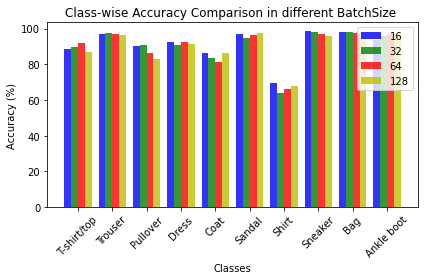

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



n_classes = len(classes_name)
bar_width = 0.2
opacity = 0.8
index = np.arange(n_classes)

# Plotting bars
plt.bar(index, correct_percentages4_norm, bar_width, alpha=opacity, color='b', label='16')
plt.bar(index + bar_width, correct_percentages1_norm, bar_width, alpha=opacity, color='g', label='32')
plt.bar(index + bar_width * 2, correct_percentages5_norm, bar_width, alpha=opacity, color='r', label='64')
plt.bar(index + bar_width * 3, correct_percentages6_norm, bar_width, alpha=opacity, color='y', label='128')

# Customizing the plot
plt.xlabel('Classes')
plt.ylabel('Accuracy (%)')
plt.title('Class-wise Accuracy Comparison in different BatchSize ')
plt.xticks(index + bar_width * 1.5, classes_name, rotation=45)
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

Epoch 1/20
430/430 [==============================] - ETA: 0s - loss: 0.7528 - accuracy: 0.7829
Epoch 1: val_accuracy improved from -inf to 0.86980, saving model to model24_norm2_batch128_e20_best_accuracy.h5
430/430 [==============================] - 44s 101ms/step - loss: 0.7528 - accuracy: 0.7829 - val_loss: 0.4943 - val_accuracy: 0.8698
Epoch 2/20
430/430 [==============================] - ETA: 0s - loss: 0.5009 - accuracy: 0.8670
Epoch 2: val_accuracy improved from 0.86980 to 0.89020, saving model to model24_norm2_batch128_e20_best_accuracy.h5
430/430 [==============================] - 43s 101ms/step - loss: 0.5009 - accuracy: 0.8670 - val_loss: 0.4273 - val_accuracy: 0.8902
Epoch 3/20
430/430 [==============================] - ETA: 0s - loss: 0.4441 - accuracy: 0.8861
Epoch 3: val_accuracy improved from 0.89020 to 0.89960, saving model to model24_norm2_batch128_e20_best_accuracy.h5
430/430 [==============================] - 43s 100ms/step - loss: 0.4441 - accuracy: 0.8861 - val_l

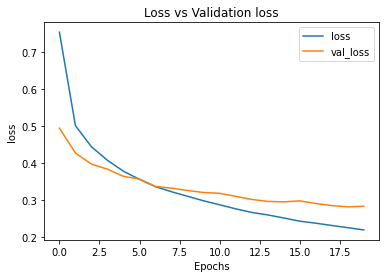

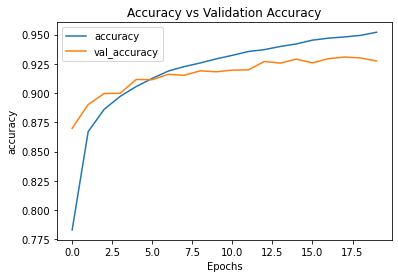

In [ ]:
model24_norm2_batch128_e20 = tf.keras.models.clone_model(model28_2)


model24_norm2_batch128_e20.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')
checkpoint_path = "model24_norm2_batch128_e20_best_accuracy.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

history = model24_norm2_batch128_e20.fit(X_train, y_train, epochs=20, batch_size = 128,
                    validation_data=(X_valid, y_valid), callbacks=[checkpoint_callback])


plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred_norm8 = model24_norm2_batch128_e20.predict(X_test)

y_pred1_classes_norm8= np.argmax(y_pred_norm8, axis=1)

accuracy = np.mean(y_pred1_classes_norm8 == y_test)
print('Accuracy:', accuracy)

test_loss8_norm, test_accuracy8_norm = model24_norm2_batch128_e20.evaluate(X_test, y_test)
print(test_loss8_norm, test_accuracy8_norm)

conf_matrix = confusion_matrix(y_test, y_pred1_classes_norm8)

print(conf_matrix)
row_sums = np.sum(conf_matrix, axis=1)
correct_percentages8_norm = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages8_norm):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 2s 7ms/step
Accuracy: 0.9185
313/313 [==============================] - 2s 7ms/step - loss: 0.3129 - accuracy: 0.9185
0.312864750623703 0.9185000061988831
[[848   2  29  14   4   0  96   1   6   0]
 [  2 980   1  12   3   0   0   0   2   0]
 [ 12   0 910   6  35   0  37   0   0   0]
 [ 11   1  13 902  39   1  30   0   2   1]
 [  1   0  41  18 897   0  43   0   0   0]
 [  0   0   0   0   0 970   0  16   0  14]
 [ 80   0  54  19  85   0 754   0   8   0]
 [  0   0   0   0   0   6   0 963   0  31]
 [  2   1   3   2   4   1   3   2 981   1]
 [  0   0   0   0   0   3   0  17   0 980]]
Class 0: T-shirt/top 84.80%
Class 1: Trouser 98.00%
Class 2: Pullover 91.00%
Class 3: Dress 90.20%
Class 4: Coat 89.70%
Class 5: Sandal 97.00%
Class 6: Shirt 75.40%
Class 7: Sneaker 96.30%
Class 8: Bag 98.10%
Class 9: Ankle boot 98.00%


Epoch 1/20
859/860 [============================>.] - ETA: 0s - loss: 0.6671 - accuracy: 0.8093
Epoch 1: val_accuracy improved from -inf to 0.87700, saving model to model24_norm2_batch64_e20_best_accuracy.h5
860/860 [==============================] - 50s 57ms/step - loss: 0.6669 - accuracy: 0.8094 - val_loss: 0.4617 - val_accuracy: 0.8770
Epoch 2/20
859/860 [============================>.] - ETA: 0s - loss: 0.4680 - accuracy: 0.8767
Epoch 2: val_accuracy improved from 0.87700 to 0.89480, saving model to model24_norm2_batch64_e20_best_accuracy.h5
860/860 [==============================] - 49s 57ms/step - loss: 0.4680 - accuracy: 0.8767 - val_loss: 0.4131 - val_accuracy: 0.8948
Epoch 3/20
859/860 [============================>.] - ETA: 0s - loss: 0.4143 - accuracy: 0.8935
Epoch 3: val_accuracy improved from 0.89480 to 0.90800, saving model to model24_norm2_batch64_e20_best_accuracy.h5
860/860 [==============================] - 49s 57ms/step - loss: 0.4144 - accuracy: 0.8935 - val_loss: 0

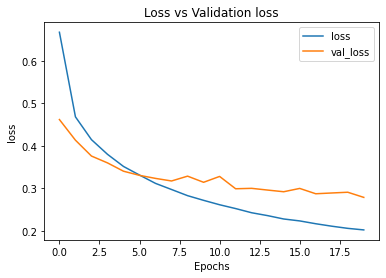

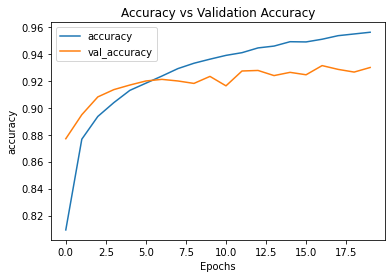

In [ ]:
model24_norm2_batch64_e20 = tf.keras.models.clone_model(model28_2)


model24_norm2_batch64_e20.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

checkpoint_path = "model24_norm2_batch64_e20_best_accuracy.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

history = model24_norm2_batch64_e20.fit(X_train, y_train, epochs=20, batch_size = 64,
                    validation_data=(X_valid, y_valid), callbacks=[checkpoint_callback])


plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred_norm9 = model24_norm2_batch64_e20.predict(X_test)

y_pred1_classes_norm9= np.argmax(y_pred_norm9, axis=1)

accuracy = np.mean(y_pred1_classes_norm9 == y_test)
print('Accuracy:', accuracy)

test_loss9_norm, test_accuracy9_norm = model24_norm2_batch64_e20.evaluate(X_test, y_test)
print(test_loss9_norm, test_accuracy9_norm)

conf_matrix = confusion_matrix(y_test, y_pred1_classes_norm9)

print(conf_matrix)
row_sums = np.sum(conf_matrix, axis=1)
correct_percentages9_norm = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages9_norm):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 2s 7ms/step
Accuracy: 0.923
313/313 [==============================] - 2s 7ms/step - loss: 0.3051 - accuracy: 0.9230
0.30505824089050293 0.9229999780654907
[[852   1  21  14   5   2  95   0  10   0]
 [  1 981   1  10   4   0   1   0   2   0]
 [ 10   0 883   7  59   0  38   0   3   0]
 [ 12   0   9 931  24   0  22   0   2   0]
 [  1   0  27  15 922   0  35   0   0   0]
 [  0   0   0   0   0 974   0  12   0  14]
 [ 78   0  64  24  79   0 749   0   6   0]
 [  0   0   0   0   0   4   0 973   0  23]
 [  0   0   1   4   3   1   1   2 988   0]
 [  0   0   0   0   0   5   0  18   0 977]]
Class 0: T-shirt/top 85.20%
Class 1: Trouser 98.10%
Class 2: Pullover 88.30%
Class 3: Dress 93.10%
Class 4: Coat 92.20%
Class 5: Sandal 97.40%
Class 6: Shirt 74.90%
Class 7: Sneaker 97.30%
Class 8: Bag 98.80%
Class 9: Ankle boot 97.70%


In [ ]:
#Rerun this one

Epoch 1/20
3435/3438 [============================>.] - ETA: 0s - loss: 0.5953 - accuracy: 0.8333
Epoch 1: val_accuracy improved from -inf to 0.89520, saving model to model24_norm2_batch16_e20_best_accuracy.h5
3438/3438 [==============================] - 66s 19ms/step - loss: 0.5953 - accuracy: 0.8334 - val_loss: 0.4125 - val_accuracy: 0.8952
Epoch 2/20
3437/3438 [============================>.] - ETA: 0s - loss: 0.4187 - accuracy: 0.8933
Epoch 2: val_accuracy improved from 0.89520 to 0.90580, saving model to model24_norm2_batch16_e20_best_accuracy.h5
3438/3438 [==============================] - 66s 19ms/step - loss: 0.4187 - accuracy: 0.8932 - val_loss: 0.3741 - val_accuracy: 0.9058
Epoch 3/20
3438/3438 [==============================] - ETA: 0s - loss: 0.3650 - accuracy: 0.9082
Epoch 3: val_accuracy improved from 0.90580 to 0.91520, saving model to model24_norm2_batch16_e20_best_accuracy.h5
3438/3438 [==============================] - 66s 19ms/step - loss: 0.3650 - accuracy: 0.9082 -

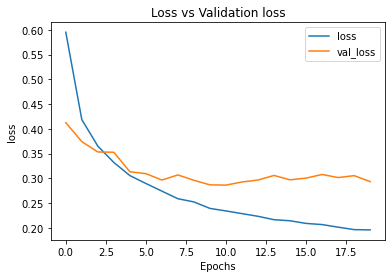

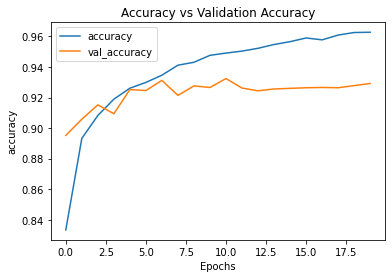

In [ ]:
model24_norm2_batch16_e20 = tf.keras.models.clone_model(model28_2)


model24_norm2_batch16_e20.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

checkpoint_path = "model24_norm2_batch16_e20_best_accuracy.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

history = model24_norm2_batch16_e20.fit(X_train, y_train, epochs=20, batch_size = 16,
                    validation_data=(X_valid, y_valid), callbacks=[checkpoint_callback])

plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred_norm10 = model24_norm2_batch16_e20.predict(X_test)

y_pred1_classes_norm10 = np.argmax(y_pred_norm10, axis=1)

accuracy = np.mean(y_pred1_classes_norm10 == y_test)
print('Accuracy:', accuracy)

test_loss10_norm, test_accuracy10_norm = model24_norm2_batch16_e20.evaluate(X_test, y_test)
print(test_loss10_norm, test_accuracy10_norm)

conf_matrix = confusion_matrix(y_test, y_pred1_classes_norm10)

print(conf_matrix)
row_sums = np.sum(conf_matrix, axis=1)
correct_percentages10_norm = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages10_norm):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 2s 7ms/step
Accuracy: 0.9261
313/313 [==============================] - 2s 7ms/step - loss: 0.3146 - accuracy: 0.9261
0.3145870566368103 0.9261000156402588
[[894   3  16  10   5   3  64   0   5   0]
 [  0 989   0   9   0   0   1   0   1   0]
 [ 20   0 916   8  27   0  29   0   0   0]
 [ 16   6  16 927  16   0  18   0   1   0]
 [  1   0  50  24 882   0  42   0   1   0]
 [  0   0   0   0   0 987   0  10   0   3]
 [106   1  64  19  61   1 744   0   4   0]
 [  0   0   0   0   0   5   0 971   0  24]
 [  0   1   2   3   0   6   3   2 983   0]
 [  0   0   1   0   0   8   0  23   0 968]]
Class 0: T-shirt/top 89.40%
Class 1: Trouser 98.90%
Class 2: Pullover 91.60%
Class 3: Dress 92.70%
Class 4: Coat 88.20%
Class 5: Sandal 98.70%
Class 6: Shirt 74.40%
Class 7: Sneaker 97.10%
Class 8: Bag 98.30%
Class 9: Ankle boot 96.80%


Epoch 1/20
1719/1719 [==============================] - ETA: 0s - loss: 0.6313 - accuracy: 0.8220
Epoch 1: val_accuracy improved from -inf to 0.88220, saving model to model24_norm2_batch32_e20_best_accuracy.h5
1719/1719 [==============================] - 55s 32ms/step - loss: 0.6313 - accuracy: 0.8220 - val_loss: 0.4518 - val_accuracy: 0.8822
Epoch 2/20
1718/1719 [============================>.] - ETA: 0s - loss: 0.4412 - accuracy: 0.8856
Epoch 2: val_accuracy improved from 0.88220 to 0.89760, saving model to model24_norm2_batch32_e20_best_accuracy.h5
1719/1719 [==============================] - 55s 32ms/step - loss: 0.4412 - accuracy: 0.8856 - val_loss: 0.3925 - val_accuracy: 0.8976
Epoch 3/20
1719/1719 [==============================] - ETA: 0s - loss: 0.3914 - accuracy: 0.9009
Epoch 3: val_accuracy improved from 0.89760 to 0.91140, saving model to model24_norm2_batch32_e20_best_accuracy.h5
1719/1719 [==============================] - 55s 32ms/step - loss: 0.3914 - accuracy: 0.9009 -

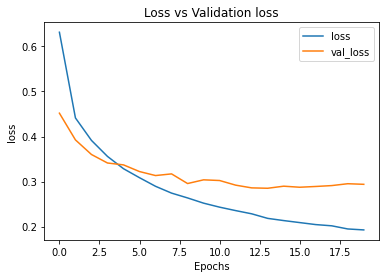

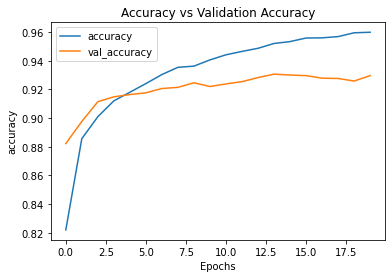

In [ ]:
model24_norm2_batch32_e20 = tf.keras.models.clone_model(model28_2)


model24_norm2_batch32_e20.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

checkpoint_path = "model24_norm2_batch32_e20_best_accuracy.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

history = model24_norm2_batch32_e20.fit(X_train, y_train, epochs=20, batch_size = 32,
                    validation_data=(X_valid, y_valid), callbacks=[checkpoint_callback])


plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred_norm11 = model24_norm2_batch32_e20.predict(X_test)

y_pred1_classes_norm11 = np.argmax(y_pred_norm11, axis=1)

accuracy = np.mean(y_pred1_classes_norm11 == y_test)
print('Accuracy:', accuracy)

test_loss11_norm, test_accuracy11_norm = model24_norm2_batch32_e20.evaluate(X_test, y_test)
print(test_loss11_norm, test_accuracy11_norm)

conf_matrix = confusion_matrix(y_test, y_pred1_classes_norm11)

print(conf_matrix)
row_sums = np.sum(conf_matrix, axis=1)
correct_percentages11_norm = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages11_norm):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 2s 6ms/step
Accuracy: 0.924
313/313 [==============================] - 2s 6ms/step - loss: 0.3172 - accuracy: 0.9240
0.31715479493141174 0.9240000247955322
[[918   1  19   8   2   1  48   0   3   0]
 [  1 980   1  16   0   0   1   0   1   0]
 [ 20   1 918   7  27   0  27   0   0   0]
 [ 14   2   8 947   9   0  20   0   0   0]
 [  2   0  62  30 853   0  53   0   0   0]
 [  0   0   0   1   0 978   0  16   0   5]
 [134   0  66  23  47   0 728   0   2   0]
 [  0   0   0   0   0   6   0 971   0  23]
 [  3   0   5   5   2   1   6   5 971   2]
 [  0   0   0   0   0   6   0  18   0 976]]
Class 0: T-shirt/top 91.80%
Class 1: Trouser 98.00%
Class 2: Pullover 91.80%
Class 3: Dress 94.70%
Class 4: Coat 85.30%
Class 5: Sandal 97.80%
Class 6: Shirt 72.80%
Class 7: Sneaker 97.10%
Class 8: Bag 97.10%
Class 9: Ankle boot 97.60%


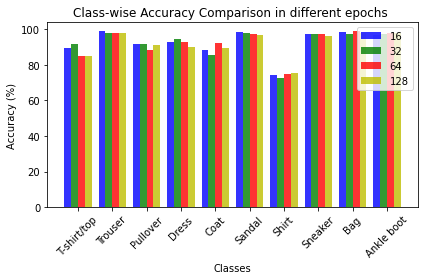

In [ ]:
n_classes = len(classes_name)
bar_width = 0.2
opacity = 0.8
index = np.arange(n_classes)

# Plotting bars
plt.bar(index, correct_percentages10_norm, bar_width, alpha=opacity, color='b', label='16')
plt.bar(index + bar_width, correct_percentages11_norm, bar_width, alpha=opacity, color='g', label='32')
plt.bar(index + bar_width * 2, correct_percentages9_norm, bar_width, alpha=opacity, color='r', label='64')
plt.bar(index + bar_width * 3, correct_percentages8_norm, bar_width, alpha=opacity, color='y', label='128')

# Customizing the plot
plt.xlabel('Classes')
plt.ylabel('Accuracy (%)')
plt.title('Class-wise Accuracy Comparison in different epochs ')
plt.xticks(index + bar_width * 1.5, classes_name, rotation=45)
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

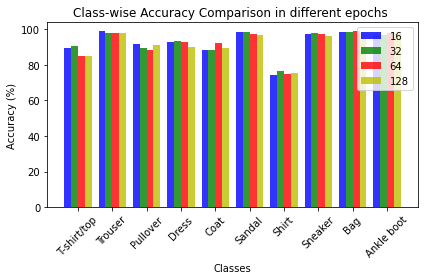

In [ ]:
n_classes = len(classes_name)
bar_width = 0.2
opacity = 0.8
index = np.arange(n_classes)

# Plotting bars
plt.bar(index, correct_percentages10_norm, bar_width, alpha=opacity, color='b', label='16')
plt.bar(index + bar_width, correct_percentages30_2, bar_width, alpha=opacity, color='g', label='32')
plt.bar(index + bar_width * 2, correct_percentages9_norm, bar_width, alpha=opacity, color='r', label='64')
plt.bar(index + bar_width * 3, correct_percentages8_norm, bar_width, alpha=opacity, color='y', label='128')

# Customizing the plot
plt.xlabel('Classes')
plt.ylabel('Accuracy (%)')
plt.title('Class-wise Accuracy Comparison in different epochs ')
plt.xticks(index + bar_width * 1.5, classes_name, rotation=45)
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

In [ ]:
#model24_norm2_batch64_e40.save('C:/Users/Asus/Desktop/New folder/model24_norm2_batch64_e40_A0.9195.h5')

Epoch 1/30
859/860 [============================>.] - ETA: 0s - loss: 0.6576 - accuracy: 0.8118
Epoch 1: val_accuracy improved from -inf to 0.87140, saving model to model24_norm2_batch64_e30_best_accuracy.h5
860/860 [==============================] - 48s 55ms/step - loss: 0.6575 - accuracy: 0.8118 - val_loss: 0.4758 - val_accuracy: 0.8714 - lr: 1.0000e-04
Epoch 2/30
859/860 [============================>.] - ETA: 0s - loss: 0.4562 - accuracy: 0.8812
Epoch 2: val_accuracy improved from 0.87140 to 0.89200, saving model to model24_norm2_batch64_e30_best_accuracy.h5
860/860 [==============================] - 48s 56ms/step - loss: 0.4561 - accuracy: 0.8813 - val_loss: 0.4267 - val_accuracy: 0.8920 - lr: 1.0000e-04
Epoch 3/30
859/860 [============================>.] - ETA: 0s - loss: 0.4048 - accuracy: 0.8967
Epoch 3: val_accuracy improved from 0.89200 to 0.89900, saving model to model24_norm2_batch64_e30_best_accuracy.h5
860/860 [==============================] - 46s 54ms/step - loss: 0.404

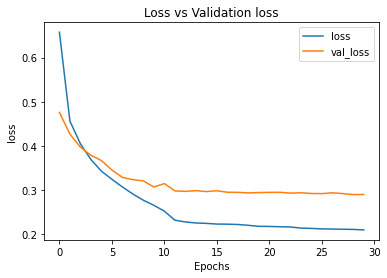

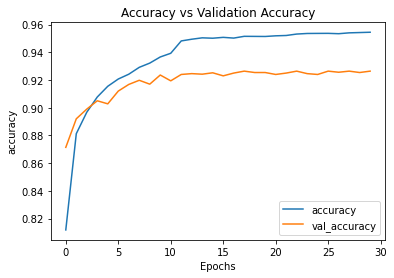

In [ ]:
model24_norm2_batch64_e40 = tf.keras.models.clone_model(model28_2)


model24_norm2_batch64_e40.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

checkpoint_path = "model24_norm2_batch64_e30_best_accuracy.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

history = model24_norm2_batch64_e40.fit(X_train, y_train, epochs=30, batch_size = 64,
                    validation_data=(X_valid, y_valid),
              callbacks=[checkpoint_callback, reduce_lr])


plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred_norm12 = model24_norm2_batch64_e40.predict(X_test)

y_pred1_classes_norm12 = np.argmax(y_pred_norm12, axis=1)

accuracy = np.mean(y_pred1_classes_norm12 == y_test)
print('Accuracy:', accuracy)

test_loss12_norm, test_accuracy12_norm = model24_norm2_batch64_e40.evaluate(X_test, y_test)
print(test_loss12_norm, test_accuracy12_norm)

conf_matrix = confusion_matrix(y_test, y_pred1_classes_norm12)

print(conf_matrix)
row_sums = np.sum(conf_matrix, axis=1)
correct_percentages12_norm = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages12_norm):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 2s 7ms/step
Accuracy: 0.921
313/313 [==============================] - 2s 8ms/step - loss: 0.3053 - accuracy: 0.9210
0.3053410053253174 0.9210000038146973
[[889   1  21  15   4   3  62   0   5   0]
 [  1 983   1   8   4   0   1   0   2   0]
 [ 19   0 882   7  51   0  41   0   0   0]
 [ 14   0  13 928  24   0  20   0   1   0]
 [  3   1  32  20 909   0  35   0   0   0]
 [  0   0   0   0   0 980   0  14   0   6]
 [116   0  50  29  83   0 719   0   3   0]
 [  0   0   0   0   0  10   0 973   0  17]
 [  2   0   0   3   3   3   5   4 980   0]
 [  1   0   0   0   0   6   0  26   0 967]]
Class 0: T-shirt/top 88.90%
Class 1: Trouser 98.30%
Class 2: Pullover 88.20%
Class 3: Dress 92.80%
Class 4: Coat 90.90%
Class 5: Sandal 98.00%
Class 6: Shirt 71.90%
Class 7: Sneaker 97.30%
Class 8: Bag 98.00%
Class 9: Ankle boot 96.70%


In [ ]:
#model24_norm2_batch64_e40.save(r'C:\Users\Asus\Desktop\New folder\modelBatch40A0.9265Loss0.2958.h5')

Epoch 1/30
1718/1719 [============================>.] - ETA: 0s - loss: 0.4942 - accuracy: 0.8599
Epoch 1: val_accuracy improved from -inf to 0.87700, saving model to model24_norm2_batch32_e30_best_accuracy.h5
1719/1719 [==============================] - 50s 29ms/step - loss: 0.4941 - accuracy: 0.8599 - val_loss: 0.4199 - val_accuracy: 0.8770 - lr: 0.0010
Epoch 2/30
1719/1719 [==============================] - ETA: 0s - loss: 0.3672 - accuracy: 0.8966
Epoch 2: val_accuracy improved from 0.87700 to 0.90540, saving model to model24_norm2_batch32_e30_best_accuracy.h5
1719/1719 [==============================] - 47s 27ms/step - loss: 0.3672 - accuracy: 0.8966 - val_loss: 0.3372 - val_accuracy: 0.9054 - lr: 0.0010
Epoch 3/30
1718/1719 [============================>.] - ETA: 0s - loss: 0.3320 - accuracy: 0.9057
Epoch 3: val_accuracy did not improve from 0.90540
1719/1719 [==============================] - 49s 28ms/step - loss: 0.3320 - accuracy: 0.9057 - val_loss: 0.3592 - val_accuracy: 0.89

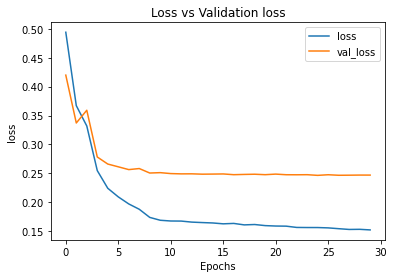

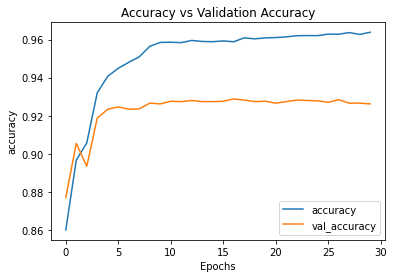

In [ ]:
model24_norm2_batch32_e40 = tf.keras.models.clone_model(model28_2)


model24_norm2_batch32_e40.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

checkpoint_path = "model24_norm2_batch32_e30_best_accuracy.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

history = model24_norm2_batch32_e40.fit(X_train, y_train, epochs=30, batch_size = 32,
                    validation_data=(X_valid, y_valid),
              callbacks=[checkpoint_callback, reduce_lr])



plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
#model24_norm2_batch32_e40.save('C:/Users/Asus/Desktop/New folder/model24_norm2_batch32_e40_A0.9296.h5')

In [ ]:
y_pred_norm13 = model24_norm2_batch32_e40.predict(X_test)

y_pred1_classes_norm13 = np.argmax(y_pred_norm13, axis=1)

accuracy = np.mean(y_pred1_classes_norm13 == y_test)
print('Accuracy:', accuracy)

test_loss13_norm, test_accuracy13_norm = model24_norm2_batch32_e40.evaluate(X_test, y_test)
print(test_loss13_norm, test_accuracy13_norm)

conf_matrix = confusion_matrix(y_test, y_pred1_classes_norm13)

print(conf_matrix)
row_sums = np.sum(conf_matrix, axis=1)
correct_percentages13_norm = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages13_norm):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 2s 7ms/step
Accuracy: 0.9296
313/313 [==============================] - 2s 7ms/step - loss: 0.2582 - accuracy: 0.9296
0.2582070529460907 0.9296000003814697
[[877   1  16   8   3   2  85   0   8   0]
 [  1 987   0   7   0   0   1   0   4   0]
 [ 14   1 909   4  33   0  39   0   0   0]
 [ 10   3  10 938  21   0  17   0   1   0]
 [  0   0  31  20 900   0  48   0   1   0]
 [  0   0   0   0   0 981   0  13   0   6]
 [ 84   2  45  29  65   0 768   0   7   0]
 [  0   0   0   0   0   4   0 981   0  15]
 [  4   0   2   1   0   1   1   1 989   1]
 [  0   0   0   0   0   5   1  28   0 966]]
Class 0: T-shirt/top 87.70%
Class 1: Trouser 98.70%
Class 2: Pullover 90.90%
Class 3: Dress 93.80%
Class 4: Coat 90.00%
Class 5: Sandal 98.10%
Class 6: Shirt 76.80%
Class 7: Sneaker 98.10%
Class 8: Bag 98.90%
Class 9: Ankle boot 96.60%


In [ ]:
#model24_norm2_batch16_e40.save('C:/Users/Asus/Desktop/New folder/model24_norm2_batch16_e40_A0.9203.h5')

Epoch 1/30
3436/3438 [============================>.] - ETA: 0s - loss: 0.5885 - accuracy: 0.8364
Epoch 1: val_accuracy improved from -inf to 0.89480, saving model to model24_norm2_batch16_e30_best_accuracy.h5
3438/3438 [==============================] - 65s 19ms/step - loss: 0.5884 - accuracy: 0.8365 - val_loss: 0.4125 - val_accuracy: 0.8948
Epoch 2/30
3436/3438 [============================>.] - ETA: 0s - loss: 0.4167 - accuracy: 0.8929
Epoch 2: val_accuracy improved from 0.89480 to 0.90680, saving model to model24_norm2_batch16_e30_best_accuracy.h5
3438/3438 [==============================] - 71s 21ms/step - loss: 0.4165 - accuracy: 0.8929 - val_loss: 0.3687 - val_accuracy: 0.9068
Epoch 3/30
3437/3438 [============================>.] - ETA: 0s - loss: 0.3654 - accuracy: 0.9079
Epoch 3: val_accuracy improved from 0.90680 to 0.91240, saving model to model24_norm2_batch16_e30_best_accuracy.h5
3438/3438 [==============================] - 71s 21ms/step - loss: 0.3654 - accuracy: 0.9079 -

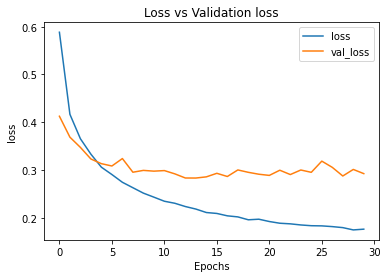

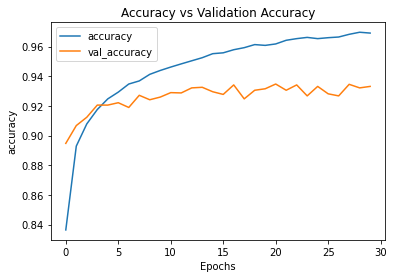

In [ ]:
model24_norm2_batch16_e40 = tf.keras.models.clone_model(model28_2)


model24_norm2_batch16_e40.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

checkpoint_path = "model24_norm2_batch16_e30_best_accuracy.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

history = model24_norm2_batch16_e40.fit(X_train, y_train, epochs=30, batch_size = 16,
                    validation_data=(X_valid, y_valid), callbacks=[checkpoint_callback])



plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred_norm14 = model24_norm2_batch16_e40.predict(X_test)

y_pred1_classes_norm14 = np.argmax(y_pred_norm14, axis=1)

accuracy = np.mean(y_pred1_classes_norm14 == y_test)
print('Accuracy:', accuracy)

test_loss14_norm, test_accuracy14_norm = model24_norm2_batch16_e40.evaluate(X_test, y_test)
print(test_loss14_norm, test_accuracy14_norm)

conf_matrix = confusion_matrix(y_test, y_pred1_classes_norm14)

print(conf_matrix)
row_sums = np.sum(conf_matrix, axis=1)
correct_percentages14_norm = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages14_norm):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 2s 7ms/step
Accuracy: 0.9241
313/313 [==============================] - 2s 7ms/step - loss: 0.3190 - accuracy: 0.9241
0.3190334141254425 0.9240999817848206
[[825   1  23  17   5   0 122   0   7   0]
 [  2 981   0  10   4   0   2   0   1   0]
 [  9   0 899   8  36   0  47   0   1   0]
 [ 11   2   8 937  22   0  19   0   1   0]
 [  0   1  34  13 891   0  61   0   0   0]
 [  0   0   0   0   0 990   0   6   1   3]
 [ 71   0  49  23  50   1 801   0   5   0]
 [  0   0   0   0   0   6   0 983   0  11]
 [  0   0   3   6   1   2   4   1 982   1]
 [  0   0   0   0   0   9   0  39   0 952]]
Class 0: T-shirt/top 82.50%
Class 1: Trouser 98.10%
Class 2: Pullover 89.90%
Class 3: Dress 93.70%
Class 4: Coat 89.10%
Class 5: Sandal 99.00%
Class 6: Shirt 80.10%
Class 7: Sneaker 98.30%
Class 8: Bag 98.20%
Class 9: Ankle boot 95.20%


In [ ]:
#model24_norm2_batch128_e40.save('C:/Users/Asus/Desktop/New folder/model24_norm2_batch128_e40_A0.9196.h5')
model345 = load_model('C:/Users/Asus/Desktop/New folder/model24_norm2_batch128_e40_A0.9196.h5')

Epoch 1/30
430/430 [==============================] - ETA: 0s - loss: 0.7399 - accuracy: 0.7838
Epoch 1: val_accuracy improved from -inf to 0.87060, saving model to model24_norm2_batch128_e30_best_accuracy.h5
430/430 [==============================] - 47s 107ms/step - loss: 0.7399 - accuracy: 0.7838 - val_loss: 0.4938 - val_accuracy: 0.8706
Epoch 2/30
430/430 [==============================] - ETA: 0s - loss: 0.5030 - accuracy: 0.8663
Epoch 2: val_accuracy improved from 0.87060 to 0.88400, saving model to model24_norm2_batch128_e30_best_accuracy.h5
430/430 [==============================] - 46s 107ms/step - loss: 0.5030 - accuracy: 0.8663 - val_loss: 0.4458 - val_accuracy: 0.8840
Epoch 3/30
430/430 [==============================] - ETA: 0s - loss: 0.4484 - accuracy: 0.8831
Epoch 3: val_accuracy improved from 0.88400 to 0.89740, saving model to model24_norm2_batch128_e30_best_accuracy.h5
430/430 [==============================] - 46s 106ms/step - loss: 0.4484 - accuracy: 0.8831 - val_l

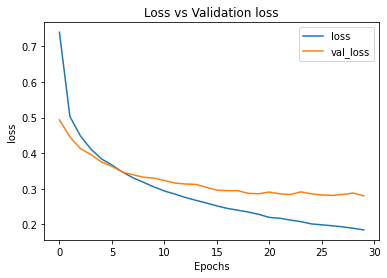

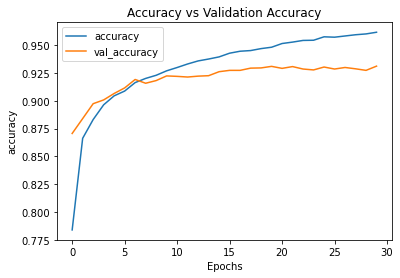

In [ ]:
model24_norm2_batch128_e40 = tf.keras.models.clone_model(model28_2)


model24_norm2_batch128_e40.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

checkpoint_path = "model24_norm2_batch128_e30_best_accuracy.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

history = model24_norm2_batch128_e40.fit(X_train, y_train, epochs=30, batch_size = 128,
                    validation_data=(X_valid, y_valid), callbacks=[checkpoint_callback])


plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

In [ ]:
y_pred_norm15 = model24_norm2_batch128_e40.predict(X_test)

y_pred1_classes_norm15 = np.argmax(y_pred_norm15, axis=1)

accuracy = np.mean(y_pred1_classes_norm15 == y_test)
print('Accuracy:', accuracy)

test_loss15_norm, test_accuracy15_norm = model24_norm2_batch128_e40.evaluate(X_test, y_test)
print(test_loss15_norm, test_accuracy15_norm)

conf_matrix = confusion_matrix(y_test, y_pred1_classes_norm15)

print(conf_matrix)
row_sums = np.sum(conf_matrix, axis=1)
correct_percentages15_norm = np.diag(conf_matrix) / row_sums * 100

# Print the percentages of correct predictions
for i, percentage in enumerate(correct_percentages15_norm):
    print(f'Class {i}: {classes_name[i]} {percentage:.2f}%' )

313/313 [==============================] - 2s 7ms/step
Accuracy: 0.9251
313/313 [==============================] - 2s 7ms/step - loss: 0.3003 - accuracy: 0.9251
0.3003232777118683 0.9251000285148621
[[871   1  20  12   3   1  86   0   6   0]
 [  1 986   1   7   1   0   2   0   2   0]
 [ 14   1 915   6  28   0  34   0   2   0]
 [ 12   2  13 928  15   0  29   0   1   0]
 [  0   0  46  25 857   0  71   0   1   0]
 [  0   0   0   0   0 985   0  13   0   2]
 [ 84   0  56  21  42   0 789   0   8   0]
 [  0   0   0   0   0   5   0 985   0  10]
 [  3   0   2   7   1   2   2   3 980   0]
 [  0   0   0   0   0   6   1  38   0 955]]
Class 0: T-shirt/top 87.10%
Class 1: Trouser 98.60%
Class 2: Pullover 91.50%
Class 3: Dress 92.80%
Class 4: Coat 85.70%
Class 5: Sandal 98.50%
Class 6: Shirt 78.90%
Class 7: Sneaker 98.50%
Class 8: Bag 98.00%
Class 9: Ankle boot 95.50%


#After doing all the different batchsize tests, we can see that having a batch size of 16 gives us good accuracy but seems to overfit. While having a batch size of 32 was the best becuase it got the highest accuracy and lowest loss.

Another observation is that after increasing the model by 12.5 epochs the model tend accuracy tends to increase by 1 on the training data. So we ended up having a best accuracy of 0.9297

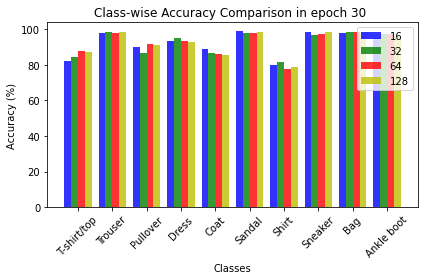

In [ ]:
n_classes = len(classes_name)
bar_width = 0.2
opacity = 0.8
index = np.arange(n_classes)

# Plotting bars
plt.bar(index, correct_percentages14_norm, bar_width, alpha=opacity, color='b', label='16')
plt.bar(index + bar_width, correct_percentages13_norm, bar_width, alpha=opacity, color='g', label='32')
plt.bar(index + bar_width * 2, correct_percentages12_norm, bar_width, alpha=opacity, color='r', label='64')
plt.bar(index + bar_width * 3, correct_percentages15_norm, bar_width, alpha=opacity, color='y', label='128')

# Customizing the plot
plt.xlabel('Classes')
plt.ylabel('Accuracy (%)')
plt.title('Class-wise Accuracy Comparison in epoch 30 ')
plt.xticks(index + bar_width * 1.5, classes_name, rotation=45)
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

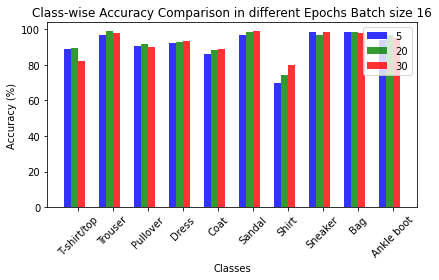

In [ ]:
n_classes = len(classes_name)
bar_width = 0.2
opacity = 0.8
index = np.arange(n_classes)

# Plotting bars
plt.bar(index, correct_percentages4_norm, bar_width, alpha=opacity, color='b', label='5')
plt.bar(index + bar_width, correct_percentages10_norm, bar_width, alpha=opacity, color='g', label='20')
plt.bar(index + bar_width * 2, correct_percentages14_norm, bar_width, alpha=opacity, color='r', label='30')


# Customizing the plot
plt.xlabel('Classes')
plt.ylabel('Accuracy (%)')
plt.title('Class-wise Accuracy Comparison in different Epochs Batch size 16')
plt.xticks(index + bar_width * 1.5, classes_name, rotation=45)
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

In [ ]:
#Change later

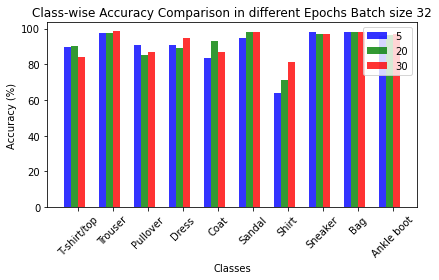

In [ ]:
n_classes = len(classes_name)
bar_width = 0.2
opacity = 0.8
index = np.arange(n_classes)

# Plotting bars
plt.bar(index, correct_percentages1_norm, bar_width, alpha=opacity, color='b', label='5')
plt.bar(index + bar_width, correct_percentages30_1, bar_width, alpha=opacity, color='g', label='20')
plt.bar(index + bar_width * 2, correct_percentages13_norm, bar_width, alpha=opacity, color='r', label='30')


# Customizing the plot
plt.xlabel('Classes')
plt.ylabel('Accuracy (%)')
plt.title('Class-wise Accuracy Comparison in different Epochs Batch size 32')
plt.xticks(index + bar_width * 1.5, classes_name, rotation=45)
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

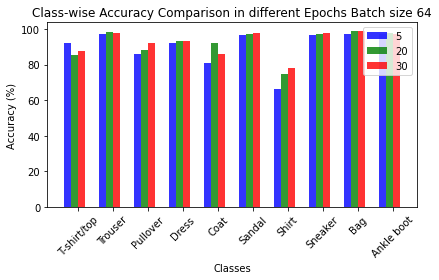

In [ ]:
n_classes = len(classes_name)
bar_width = 0.2
opacity = 0.8
index = np.arange(n_classes)

# Plotting bars
plt.bar(index, correct_percentages5_norm, bar_width, alpha=opacity, color='b', label='5')
plt.bar(index + bar_width, correct_percentages9_norm, bar_width, alpha=opacity, color='g', label='20')
plt.bar(index + bar_width * 2, correct_percentages12_norm, bar_width, alpha=opacity, color='r', label='30')


# Customizing the plot
plt.xlabel('Classes')
plt.ylabel('Accuracy (%)')
plt.title('Class-wise Accuracy Comparison in different Epochs Batch size 64')
plt.xticks(index + bar_width * 1.5, classes_name, rotation=45)
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

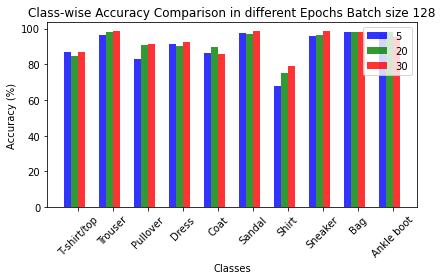

In [ ]:
n_classes = len(classes_name)
bar_width = 0.2
opacity = 0.8
index = np.arange(n_classes)

# Plotting bars
plt.bar(index, correct_percentages6_norm, bar_width, alpha=opacity, color='b', label='5')
plt.bar(index + bar_width, correct_percentages8_norm, bar_width, alpha=opacity, color='g', label='20')
plt.bar(index + bar_width * 2, correct_percentages15_norm, bar_width, alpha=opacity, color='r', label='30')


# Customizing the plot
plt.xlabel('Classes')
plt.ylabel('Accuracy (%)')
plt.title('Class-wise Accuracy Comparison in different Epochs Batch size 128')
plt.xticks(index + bar_width * 1.5, classes_name, rotation=45)
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

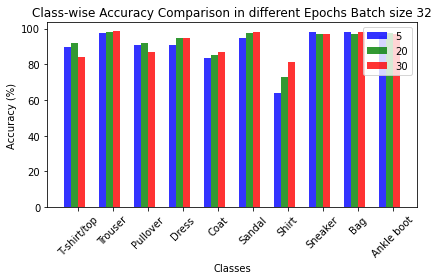

In [ ]:
n_classes = len(classes_name)
bar_width = 0.2
opacity = 0.8
index = np.arange(n_classes)

# Plotting bars
plt.bar(index, correct_percentages1_norm, bar_width, alpha=opacity, color='b', label='5')
plt.bar(index + bar_width, correct_percentages11_norm, bar_width, alpha=opacity, color='g', label='20')
plt.bar(index + bar_width * 2, correct_percentages13_norm, bar_width, alpha=opacity, color='r', label='30')


# Customizing the plot
plt.xlabel('Classes')
plt.ylabel('Accuracy (%)')
plt.title('Class-wise Accuracy Comparison in different Epochs Batch size 32')
plt.xticks(index + bar_width * 1.5, classes_name, rotation=45)
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

Epoch 1/20
1718/1719 [============================>.] - ETA: 0s - loss: 0.6194 - accuracy: 0.8334
Epoch 1: val_accuracy improved from -inf to 0.88340, saving model to best_accuracy.h5
1719/1719 [==============================] - 51s 30ms/step - loss: 0.6193 - accuracy: 0.8334 - val_loss: 0.4484 - val_accuracy: 0.8834
Epoch 2/20
1718/1719 [============================>.] - ETA: 0s - loss: 0.4742 - accuracy: 0.8779
Epoch 2: val_accuracy improved from 0.88340 to 0.90040, saving model to best_accuracy.h5
1719/1719 [==============================] - 53s 31ms/step - loss: 0.4741 - accuracy: 0.8779 - val_loss: 0.4007 - val_accuracy: 0.9004
Epoch 3/20
1718/1719 [============================>.] - ETA: 0s - loss: 0.4215 - accuracy: 0.8946
Epoch 3: val_accuracy improved from 0.90040 to 0.90280, saving model to best_accuracy.h5
1719/1719 [==============================] - 52s 30ms/step - loss: 0.4214 - accuracy: 0.8947 - val_loss: 0.3989 - val_accuracy: 0.9028
Epoch 4/20
1719/1719 [===============

313/313 [==============================] - 2s 7ms/step
Accuracy: 0.0
 20/313 [>.............................] - ETA: 2s - loss: 0.3384 - accuracy: 0.9281

<ipython-input-13-b85599163710>:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  accuracy = np.mean(y_pred30_1 == y_test)


313/313 [==============================] - 2s 7ms/step - loss: 0.3457 - accuracy: 0.9197
0.3457207977771759 0.919700026512146
Confusion Matrix:
 [[857   0  12  18   3   0 102   0   8   0]
 [  0 976   3  15   3   0   2   0   1   0]
 [ 16   0 867  12  39   0  65   0   1   0]
 [ 13   1   7 937   9   0  31   0   2   0]
 [  2   0  43  35 852   0  67   0   1   0]
 [  0   0   0   0   0 987   0   9   0   4]
 [ 75   0  43  26  46   0 800   0  10   0]
 [  0   0   0   0   0  11   0 976   0  13]
 [  0   0   2   7   3   3   3   1 980   1]
 [  1   0   0   0   0   5   0  29   0 965]]
Class 0: T-shirt/top 85.70%
Class 1: Trouser 97.60%
Class 2: Pullover 86.70%
Class 3: Dress 93.70%
Class 4: Coat 85.20%
Class 5: Sandal 98.70%
Class 6: Shirt 80.00%
Class 7: Sneaker 97.60%
Class 8: Bag 98.00%
Class 9: Ankle boot 96.50%


In [ ]:
#model28_1.save(r'C:\Users\Asus\Desktop\New folder\model28_1.h5')

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Split the train set into train and validation sets
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [ ]:
pip install resnet


  Created wheel for resnet: filename=resnet-0.1-py3-none-any.whl size=10042 sha256=a2280ae41a08b690510c162fe4b07a22b83745b4fbf83638a0104918b660c4af
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\3c\db\ed\d285a3be8fa331aca2474dbd87b0e6c2ce5a9060f836723464
Successfully built resnet


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,datasets,models
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
from torch.utils.data import random_split
from classification_models.tfkeras import Classifiers
from PIL import Image

#Changing the data shape on to input it into resnet 18. This is because ResNet18 has a differnt size which is 244x244x3.

In [ ]:




# Define the target size
target_size = (244, 244)

# Load the Fashion MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Resize the images to the target size with 3 channels
X_test_resized = np.zeros((X_test.shape[0], target_size[0], target_size[1], 3), dtype=np.uint8)
for i in range(X_test.shape[0]):
    # Convert grayscale image to RGB
    img = Image.fromarray(X_test[i])
    img = img.convert('RGB')
    # Resize the image to the target size
    img_resized = img.resize(target_size)
    X_test_resized[i] = np.array(img_resized)

X_train_full_resized = np.zeros((X_train_full.shape[0], target_size[0], target_size[1], 3), dtype=np.uint8)
for i in range(X_train_full.shape[0]):
    # Convert grayscale image to RGB
    img = Image.fromarray(X_train_full[i])
    img = img.convert('RGB')
    # Resize the image to the target size
    img_resized = img.resize(target_size)
    X_train_full_resized[i] = np.array(img_resized)

# Normalize the image data
X_test_resized = X_test_resized.astype('float32') / 255.0
X_train_full_resized = X_train_full_resized.astype('float32') / 255.0

X_train, X_valid = X_train_full_resized :-5000], X_train_full_resized[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

#Changing the output layer from 1000 classes to 10 classes, well not changing, add a final output layer. Thats why we need to freeze the layers so we can get the pretrained layers.

In [ ]:
ResNet18, preprocess_input = Classifiers.get('resnet18')
model_resnet = ResNet18(input_shape=(244, 244, 3), weights='imagenet', include_top=False)

# Freeze the pre-trained layers
for layer in model_resnet.layers:
    layer.trainable = False

# Add a new output layer
x = model_resnet.output
# Add global pool to reduce the size since we have some empty space
x = tf.keras.layers.GlobalAveragePooling2D()(x)
# Adding extra neurons
x = tf.keras.layers.Dense(128, activation='relu')(x)
# Chagning the dense layer to having a classification of 10
predictions = tf.keras.layers.Dense(10, activation='softmax')(x)
model_resnet = tf.keras.models.Model(inputs=model_resnet.input, outputs=predictions)

# Compile the model
model_resnet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Load the saved weights
model_resnet.load_weights('C:/Users/Asus/Downloads/resnet18_imagenet_1000_no_top.h5', by_name=True)

In [ ]:
history = model_resnet.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid), batch_size = 64)

860/860 [==============================] - 1298s 2s/step - loss: 0.8303 - accuracy: 0.7467 - val_loss: 0.5064 - val_accuracy: 0.8308


In [ ]:
#model_resnet.save(r'C:\Users\Asus\Desktop\New folder\Resnet0.83.h5')

#Same thing except normalizing and changing it a 28, 28, 3 input shape

In [ ]:


train_x = X_train
val_x = X_valid
test_x = X_test
#Normalizing and changing the shape to a 28 x 28 x 3
train_x = np.repeat(train_x[..., np.newaxis], 3, -1) / 255.0
val_x = np.repeat(val_x[..., np.newaxis], 3, -1) / 255.0
test_x = np.repeat(test_x[..., np.newaxis], 3, -1) / 255.0
ResNet18, preprocess_input = Classifiers.get('resnet18')
model_resnet = ResNet18(weights='imagenet', input_shape=(28, 28, 3), include_top=False)

# Freeze the pre-trained layers
for layer in model_resnet.layers:
    layer.trainable = False

# Add a new output layer
x = model_resnet.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
predictions = tf.keras.layers.Dense(10, activation='softmax')(x)
model_resnet = tf.keras.models.Model(inputs=model_resnet.input, outputs=predictions)



model_resnet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')
model_resnet.fit(train_x, y_train, epochs=50,
              validation_data=(val_x, y_valid))




Epoch 1/50
1719/1719 [==============================] - 41s 24ms/step - loss: 2.1859 - accuracy: 0.2925 - val_loss: 2.0291 - val_accuracy: 0.3560
Epoch 2/50
1719/1719 [==============================] - 44s 25ms/step - loss: 1.8476 - accuracy: 0.4326 - val_loss: 1.7007 - val_accuracy: 0.4644
Epoch 3/50
1719/1719 [==============================] - 42s 24ms/step - loss: 1.5964 - accuracy: 0.4878 - val_loss: 1.5179 - val_accuracy: 0.4992
Epoch 4/50
1719/1719 [==============================] - 40s 23ms/step - loss: 1.4570 - accuracy: 0.5112 - val_loss: 1.4091 - val_accuracy: 0.5156
Epoch 5/50
1719/1719 [==============================] - 41s 24ms/step - loss: 1.3701 - accuracy: 0.5295 - val_loss: 1.3369 - val_accuracy: 0.5520
Epoch 6/50
1719/1719 [==============================] - 41s 24ms/step - loss: 1.3076 - accuracy: 0.5465 - val_loss: 1.2796 - val_accuracy: 0.5604
Epoch 7/50
1719/1719 [==============================] - 42s 24ms/step - loss: 1.2586 - accuracy: 0.5626 - val_loss: 1.2309 -

In [ ]:
#model_resnet.save(r'C:\Users\Asus\Desktop\New folder\ResGray.h5')

In [ ]:
train_x = X_train
val_x = X_valid
test_x = X_test
train_x = np.repeat(train_x[..., np.newaxis], 1, -1) / 255.0
val_x = np.repeat(val_x[..., np.newaxis], 1, -1) / 255.0
test_x = np.repeat(test_x[..., np.newaxis], 1, -1) / 255.0

In [ ]:
train_x = X_train
val_x = X_valid
test_x = X_test
train_x = np.repeat(train_x[..., np.newaxis], 1, -1) / 255.0
val_x = np.repeat(val_x[..., np.newaxis], 1, -1) / 255.0
test_x = np.repeat(test_x[..., np.newaxis], 1, -1) / 255.0

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, ZeroPadding2D
from keras.models import Model

#Input shape of 244, 244, 3 took 3 hours for one epoch so i changed manually changed the input model of the layer to
#28x28x1 on the pretrained model. This saved time.
def ResNet18_gray(input_shape=(28, 28, 1)):
    # set the input tensor
    x = tf.keras.layers.Input(shape=input_shape)

    # load the original ResNet18 model without the top layer
    resnet_model = ResNet18(include_top=False, weights=None, input_tensor=x)

    # add a new top layer for Fashion-MNIST classification
    x = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)
    x = tf.keras.layers.Flatten()(x)
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

    # construct the modified model
    model = tf.keras.Model(inputs=resnet_model.input, outputs=outputs)

    return model

# create the model
model = ResNet18_gray()

# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_x, y_train, epochs=1,
                    validation_data=(val_x, y_valid))

   4/1719 [..............................] - ETA: 12:15 - loss: 2.5422 - accuracy: 0.1797

KeyboardInterrupt: 

In [ ]:
def plot_graphs(history, metric, title):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.title(title)
    plt.show()

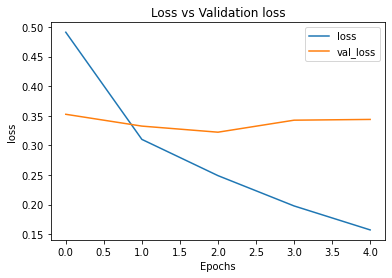

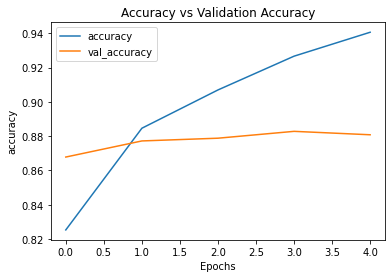

In [ ]:
plot_graphs(history=history, metric='loss', title="Loss vs Validation loss")
plot_graphs(history,'accuracy', title='Accuracy vs Validation Accuracy')

#Correlation matrix

In [ ]:
from sklearn.metrics import pairwise_distances

In [ ]:
from keras.models import load_model

model5 = load_model("C:/Users/Asus/Desktop/New folder/A0.9297L0.29.h5")
model = load_model("C:/Users/Asus/Desktop/New folder/resnet18.h5")

In [ ]:
import numpy as np

# For ResNet model
activations_resnet = model.predict(test_x)

# Compute the correlation matrix for ResNet
corr_matrix_resnet = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
      # Getting 100 images from each class
        index_i = np.where(y_test == i)[0][:100]
        index_j = np.where(y_test == j)[0][:100]
        if i != j:
            # Calculate the correlation coefficient between the flattened activations of two layers in a ResNet model
            corr = np.corrcoef(activations_resnet[index_i].flatten(), activations_resnet[index_j].flatten())[0, 1]
            # Stores the matrix and rounds it to 3 s.f since it looks better on the graph
            corr_matrix_resnet[i, j] = round(corr, 3)
        else:
            # For i == j, we correlate the vector with itself, which is always 1.
            corr_matrix_resnet[i, j] = 1.0

# For your model
activations_my_model = model5.predict(X_test)

# Compute the correlation matrix for your model
corr_matrix_my_model = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        idx_i = np.where(y_test == i)[0][:100]
        idx_j = np.where(y_test == j)[0][:100]
        if i != j:
            corr = np.corrcoef(activations_my_model[idx_i].flatten(), activations_my_model[idx_j].flatten())[0, 1]
            corr_matrix_my_model[i, j] = round(corr, 3)
        else:
            # For i == j, we correlate the vector with itself, which is always 1.
            corr_matrix_my_model[i, j] = 1.0


313/313 [==============================] - 2s 7ms/step


In [ ]:
print( corr_matrix_resnet)

[[ 1.    -0.12  -0.064 -0.004 -0.111 -0.124  0.109 -0.124 -0.111 -0.121]
 [-0.12   1.    -0.118 -0.037 -0.114 -0.115 -0.132 -0.116 -0.113 -0.113]
 [-0.064 -0.118  1.    -0.102  0.052 -0.129  0.023 -0.129 -0.11  -0.126]
 [-0.004 -0.037 -0.102  1.    -0.069 -0.127 -0.03  -0.128 -0.106 -0.123]
 [-0.111 -0.114  0.052 -0.069  1.    -0.123  0.104 -0.124 -0.107 -0.121]
 [-0.124 -0.115 -0.129 -0.127 -0.123  1.    -0.138 -0.044 -0.109 -0.074]
 [ 0.109 -0.132  0.023 -0.03   0.104 -0.138  1.    -0.138 -0.121 -0.134]
 [-0.124 -0.116 -0.129 -0.128 -0.124 -0.044 -0.138  1.    -0.115  0.008]
 [-0.111 -0.113 -0.11  -0.106 -0.107 -0.109 -0.121 -0.115  1.    -0.114]
 [-0.121 -0.113 -0.126 -0.123 -0.121 -0.074 -0.134  0.008 -0.114  1.   ]]


#Resnet Matrix

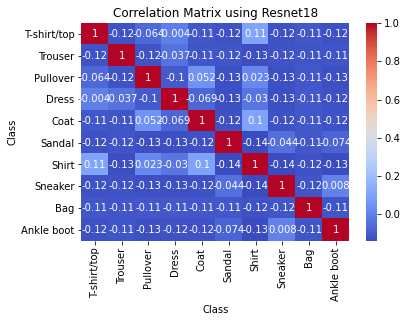

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Used to make the matrix
sns.heatmap(corr_matrix_resnet, annot=True, cmap='coolwarm',
            xticklabels=class_names, yticklabels=class_names)
# Figure 2 on the report
plt.title('Correlation Matrix using Resnet18')
plt.xlabel('Class')
plt.ylabel('Class')
plt.show()

#My NN model Matrix

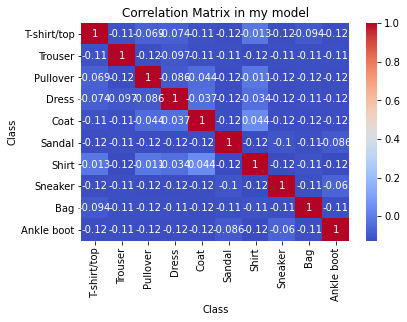

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


sns.heatmap(corr_matrix_my_model, annot=True, cmap='coolwarm',
            xticklabels=class_names, yticklabels=class_names)
# Figure 1
plt.title('Correlation Matrix in my model')
plt.xlabel('Class')
plt.ylabel('Class')
plt.show()

In [ ]:
print(corr_matrix_my_model)

[[ 1.    -0.109 -0.069 -0.074 -0.11  -0.118 -0.013 -0.118 -0.094 -0.118]
 [-0.109  1.    -0.118 -0.097 -0.114 -0.112 -0.124 -0.113 -0.113 -0.113]
 [-0.069 -0.118  1.    -0.086 -0.044 -0.118 -0.011 -0.119 -0.116 -0.119]
 [-0.074 -0.097 -0.086  1.    -0.037 -0.118 -0.034 -0.119 -0.112 -0.118]
 [-0.11  -0.114 -0.044 -0.037  1.    -0.117  0.044 -0.118 -0.117 -0.118]
 [-0.118 -0.112 -0.118 -0.118 -0.117  1.    -0.124 -0.103 -0.113 -0.086]
 [-0.013 -0.124 -0.011 -0.034  0.044 -0.124  1.    -0.125 -0.107 -0.125]
 [-0.118 -0.113 -0.119 -0.119 -0.118 -0.103 -0.125  1.    -0.114 -0.06 ]
 [-0.094 -0.113 -0.116 -0.112 -0.117 -0.113 -0.107 -0.114  1.    -0.113]
 [-0.118 -0.113 -0.119 -0.118 -0.118 -0.086 -0.125 -0.06  -0.113  1.   ]]
